Testing my implementation of **phase plots** on simple models. © 2019 Kajetan Chrapkiewicz.

- this was the main worksheet when preparing the talk for steering group meeting Oct 2019
- includes **comparison to MATLAB**
- I moved and extended diffractor part to fwi_diffractor project

##### *Notebook setup

In [1]:
from fullwavepy.signalproc.phase import *
from fullwavepy.signalproc.phase import _window_data
from fullwavepy.ioapi.segy import array2sgy

for _ in range(1):
    sp01 = {'geometry': 'regular', 'geometry_in_nodes': True,
            'souz': 50, 'recz': 150, 'soux0': 300, 'recx0': 20,
            'soudx': 100, 'recdx': 20, 'sounx': 1, 'recnx': 100}
    runfile01 = {'b_abs': 90, 'e_abs': 100, 'dim': '2D'}

In [2]:
exe = {'fullwave':       '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',
       'fullwave_local': '/home/kmc3817/light_PhD/fullwave3D/rev690/bin/fullwave3D.exe',
       'segyprep':       '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16',
       'fsprep':         '/home/kmc3817/light_PhD/fsprep/fsprep',
       'modprep':        '/home/kmc3817/light_PhD/fullwave3D/modprep/modprep.exe'}

In [3]:
# %load ~/software/fullwavepy/nb_config.py
# -----------------------------------------------------------------------------
# Load default notebook's callables (defined in fullwavepy/__init__.py)
# -----------------------------------------------------------------------------
from fullwavepy import *

# -----------------------------------------------------------------------------
# Configure matplotlib
# -----------------------------------------------------------------------------

# Set matplotlib's backend ------

# 1. non-interactive plots, display in a notebook cell
%matplotlib inline

# 2. interactive plots, display in a notebook cell
 # %matplotlib notebook

# Set matplotlib's style ---------
plt.style.reload_library()

# Combine styles (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available)

# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
from fullwavepy.logging_config import *
set_logging_level(INFO) # TRACE / DEBUG / INFO / WARNING / ERROR / CRITICAL

# -----------------------------------------------------------------------------
# Other notebook's configuration
# -----------------------------------------------------------------------------

# autocompleting
%config IPCompleter.greedy=True 

# automatically reload modules before execution
%load_ext autoreload
%autoreload 2

# Field data

## Matlab

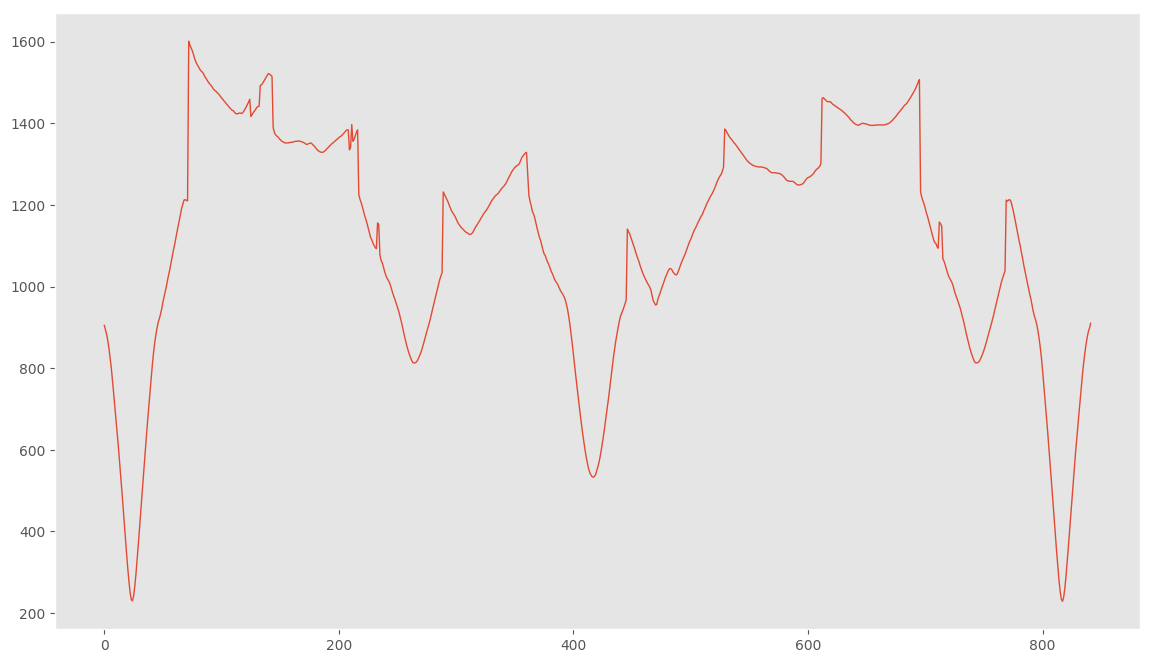

In [25]:
c = read_txt('centres_of_gausswin.txt')
picks_m = [float(i[0]) for i in c]
plt.plot(picks_m)
# plt.gca().set

In [39]:
def chunks(l, n, **kwargs): # DIVIDE LIST l INTO n-ELEMENT PIECES RETURNE AS AN ITERABLE
    for i in range(0, len(l), n):
        yield l[i : i + n]    

In [110]:
c = read_txt('gauss_wins.txt')
c = [float(i[0]) for i in c]
gauss_wins_m = np.zeros((842,1,2000))
for i, s in enumerate(chunks(c, 2000)):
    gauss_wins_m[i, 0, :] = s

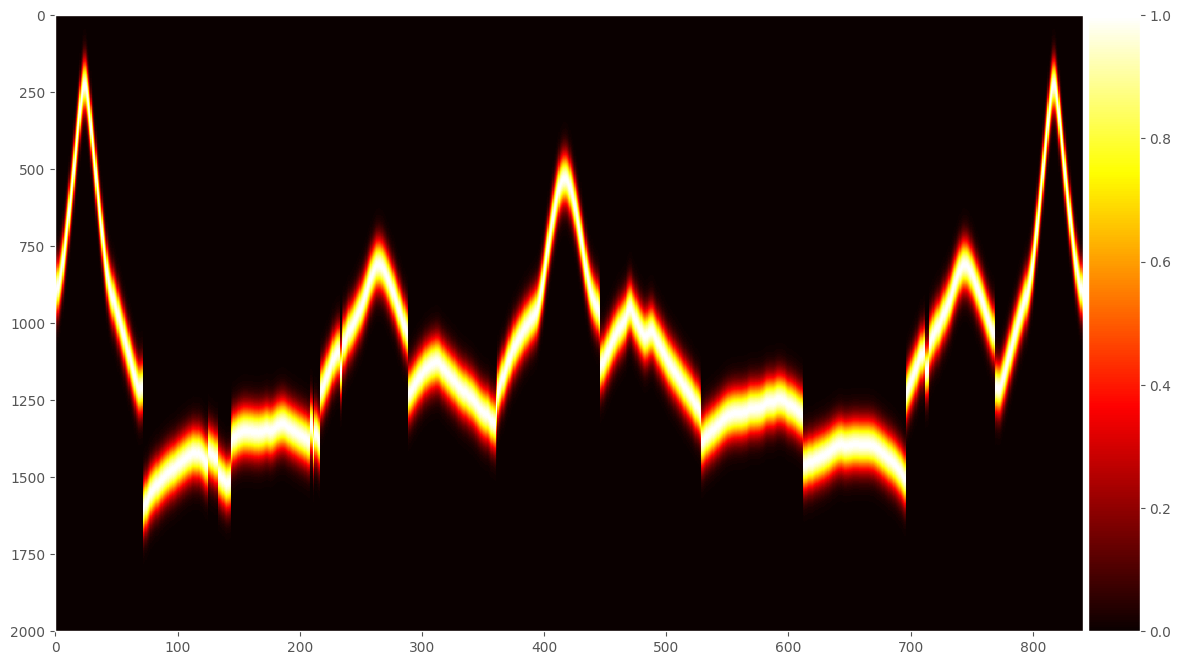

In [118]:
plot(gauss_wins_m, cmap='hot',center_cmap=0, cbar=1)

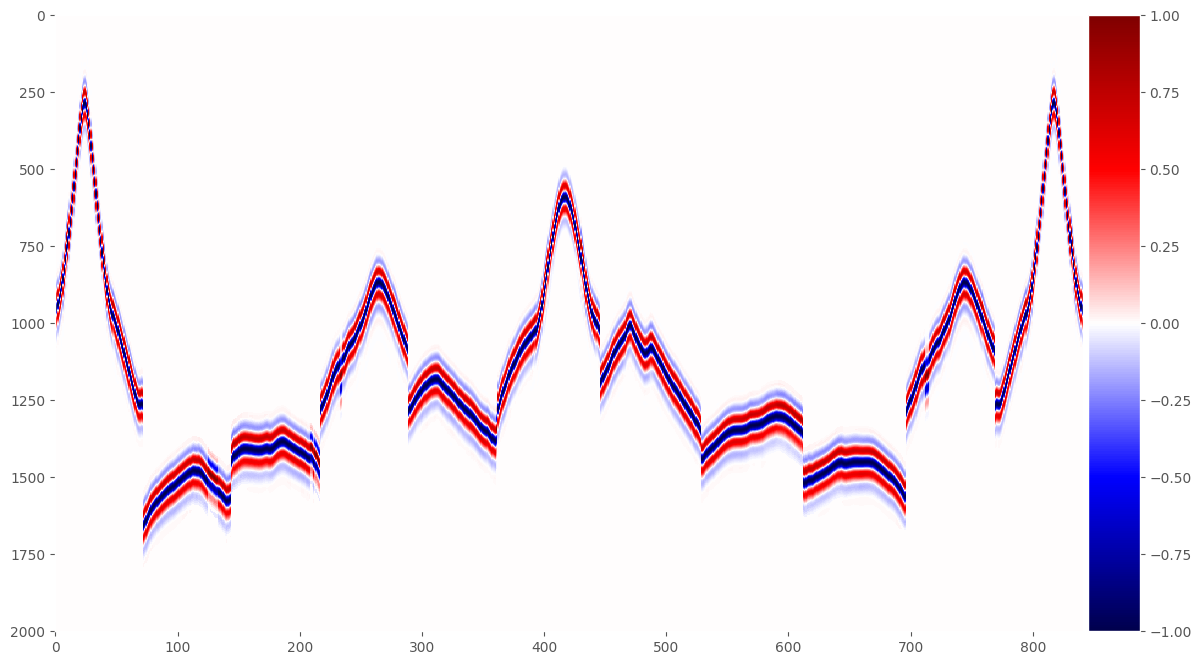

In [91]:
c = read_txt('syn_filtered.txt')
c = [float(i[0]) for i in c]
syn_filt_m = np.zeros((842,1,2000))
for i, s in enumerate(chunks(c, 2000)):
    syn_filt_m[i, 0, :] = s
plot(syn_filt_m, norm='max', cmap='seismic', cbar=1)    

In [87]:
c = read_txt('obs_filtered.txt')
c = [float(i[0]) for i in c]
obs_filt_m = np.zeros((842,1,2000))
for i, s in enumerate(chunks(c, 2000)):
    obs_filt_m[i, 0, :] = s 

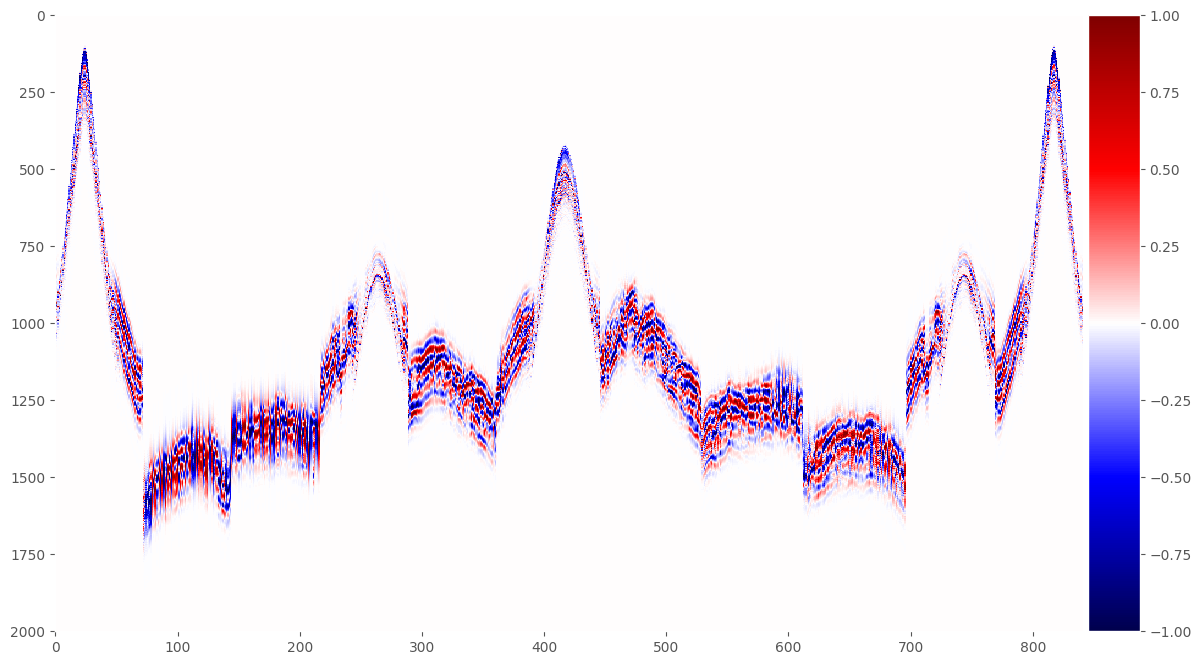

In [90]:
plot(obs_filt_m, cmap='seismic', cbar=1, norm='max')   

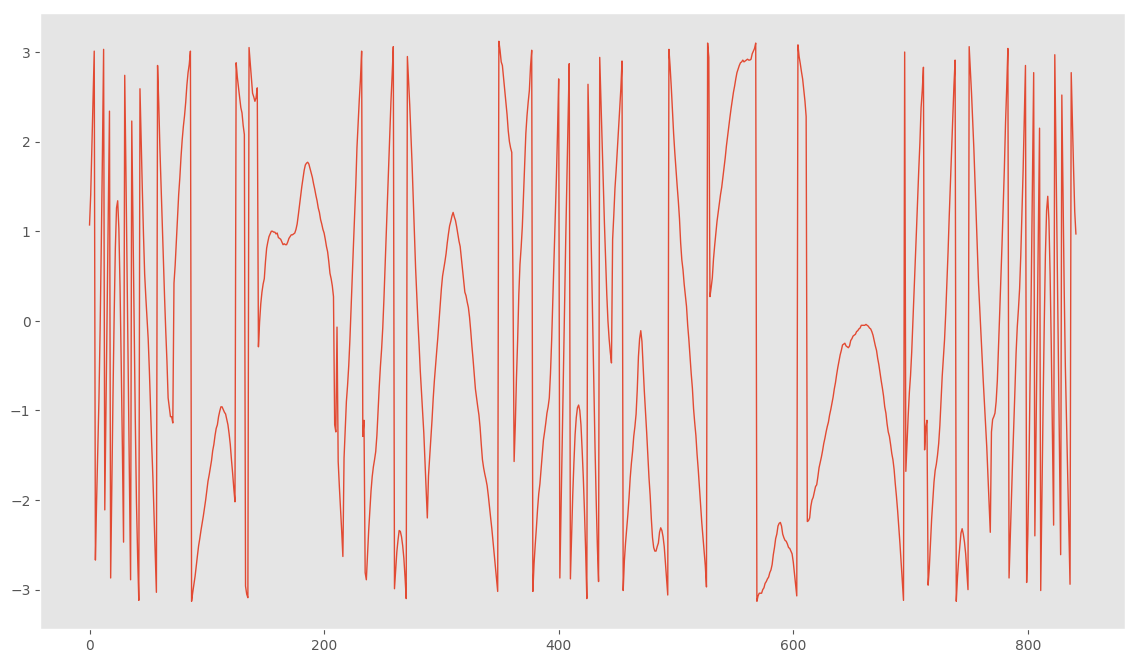

In [158]:
c = read_txt('syn_phase.txt')
syn_phase_m = [float(i[0]) for i in c]
plt.plot(syn_phase_m)

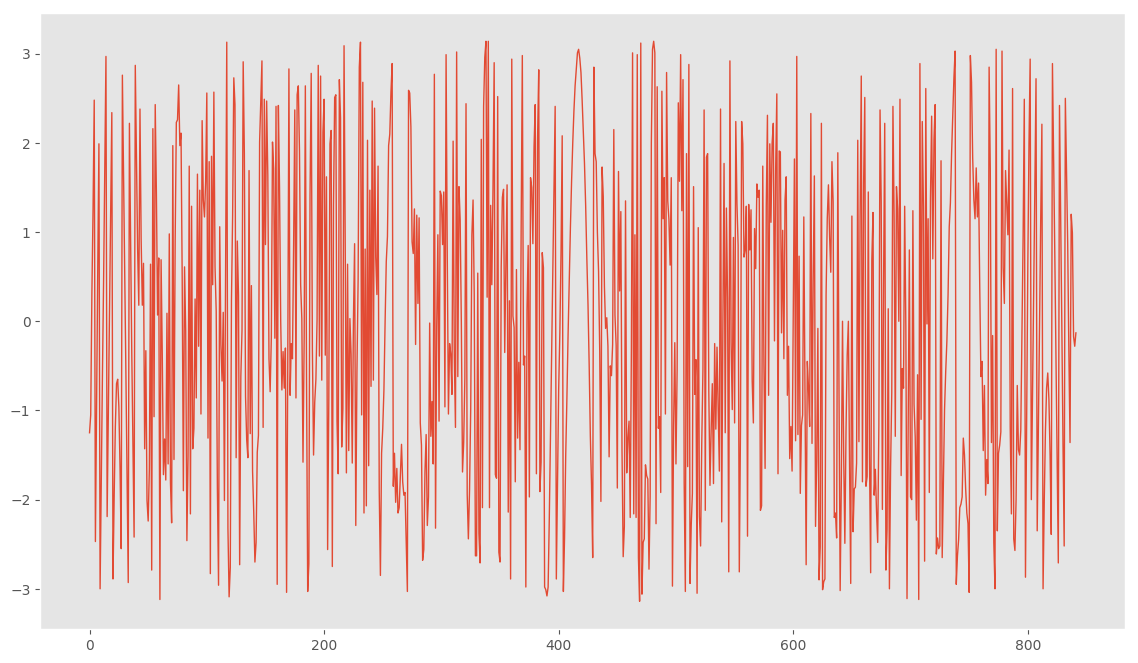

In [159]:
c = read_txt('obs_phase.txt')
obs_phase_m = [float(i[0]) for i in c]
plt.plot(obs_phase_m)

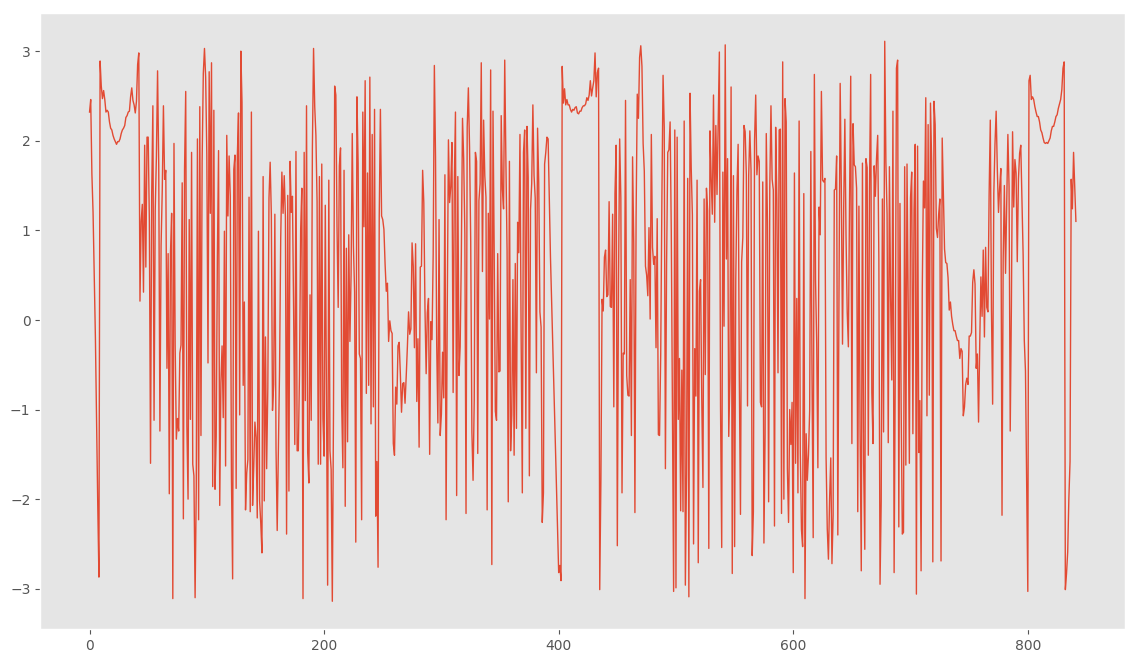

In [160]:
c = read_txt('dif_phase.txt')
dif_phase_m = [float(i[0]) for i in c]
plt.plot(dif_phase_m)

## Python

In [147]:
syn = read_any('p02-Synthetic_tracf4105.sgy', shape=(842, 1, 2000))
obs = read_any('p02-Outseis_tracf4105.sgy', shape=(842, 1, 2000))

In [148]:
picks = first_breaks(syn)

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


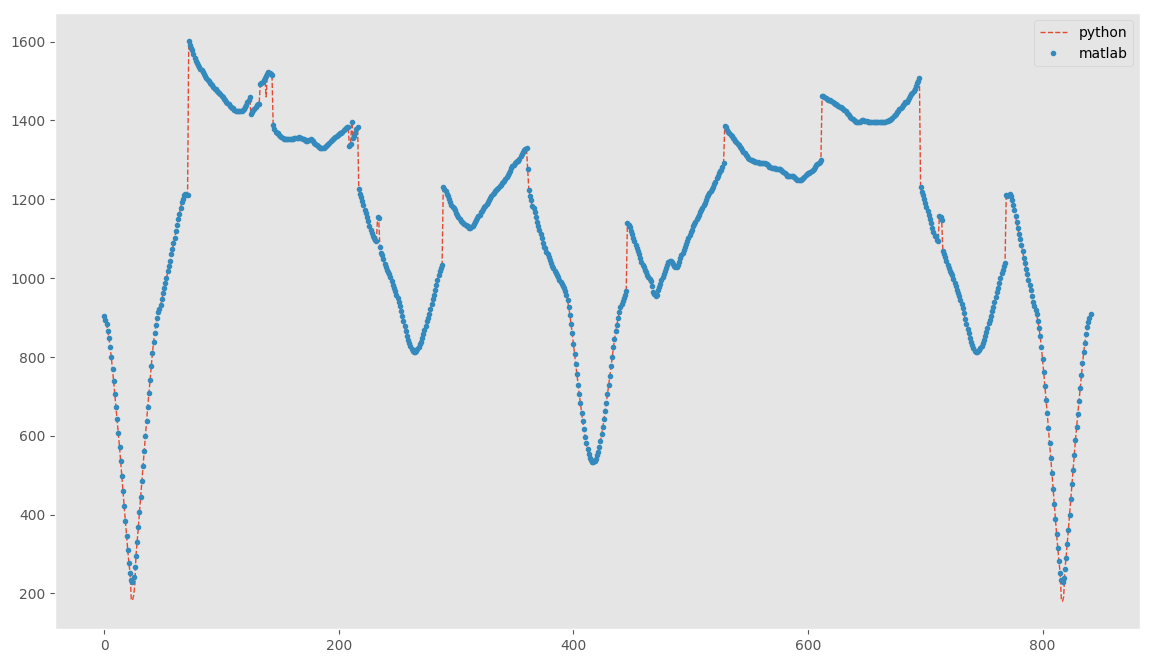

In [32]:
plt.plot(picks.ravel(), '--', label='python')
plt.plot(picks_m, '.', label='matlab')
plt.legend()

(810, 830)

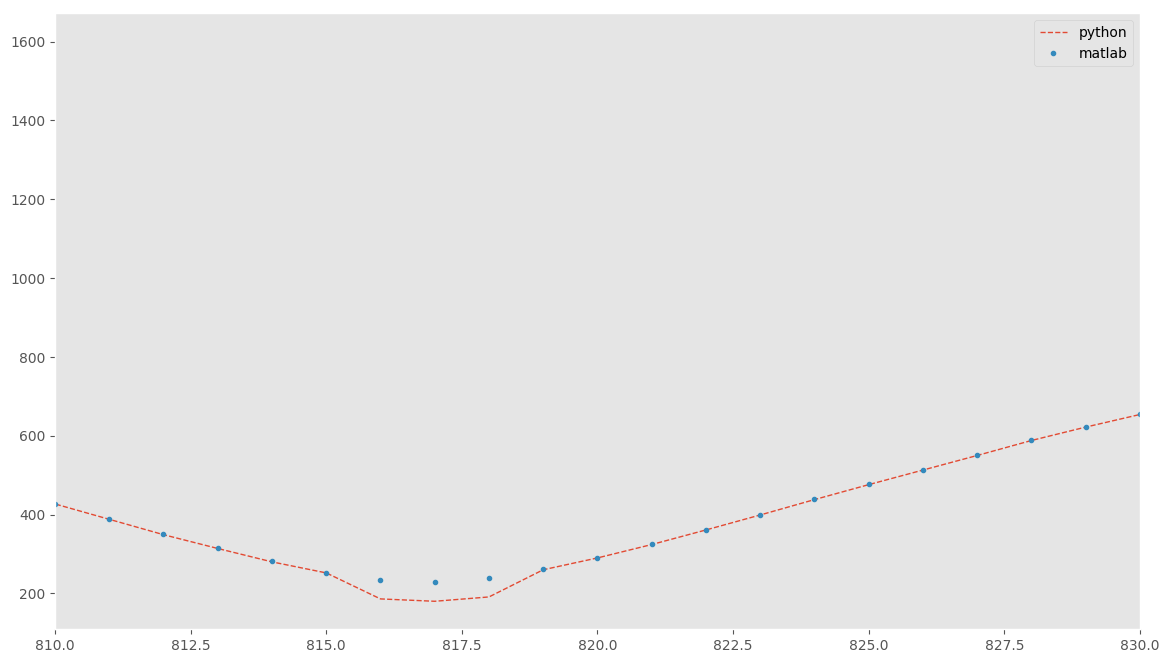

In [145]:
plt.plot(picks.ravel(), '--', label='python')
plt.plot(picks_m, '.', label='matlab')
plt.legend()
plt.xlim(810, 830)

In [121]:
syn_filt, gauss_wins = _window_data(syn, picks)
syn_filt.shape

(842, 1, 2000)

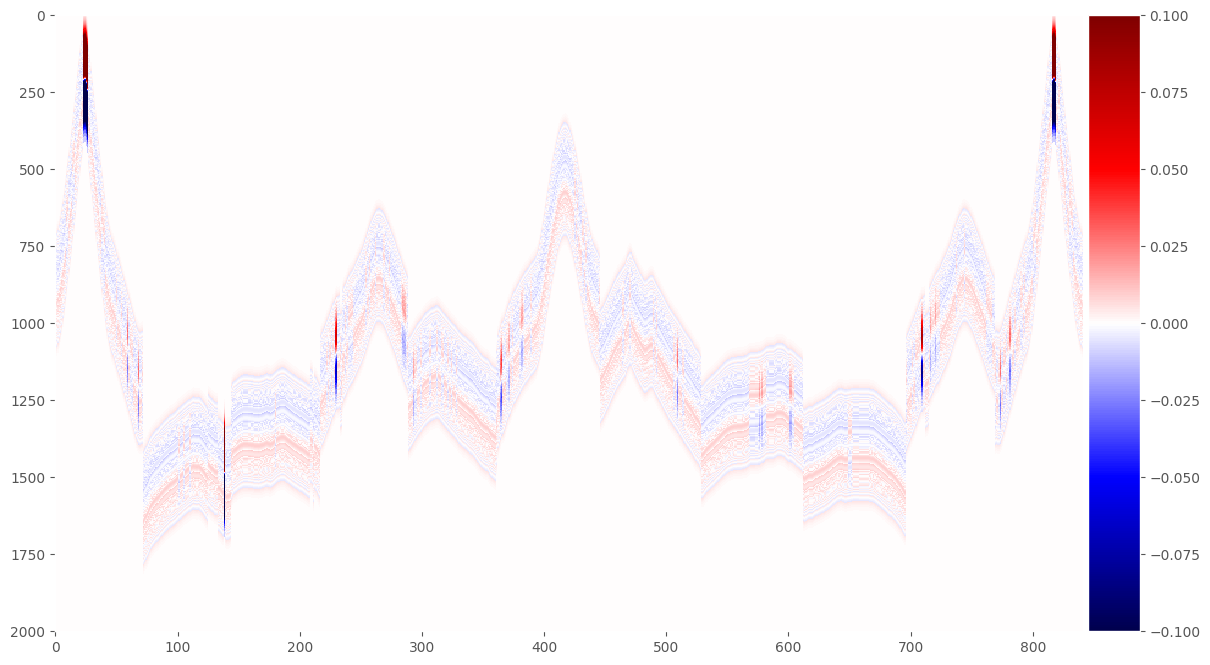

In [129]:
plot(gauss_wins-gauss_wins_m, cbar=1, cmap='seismic', clip=0.1)

In [135]:
# plot(gauss_wins, ptype='wiggle', norm='max')

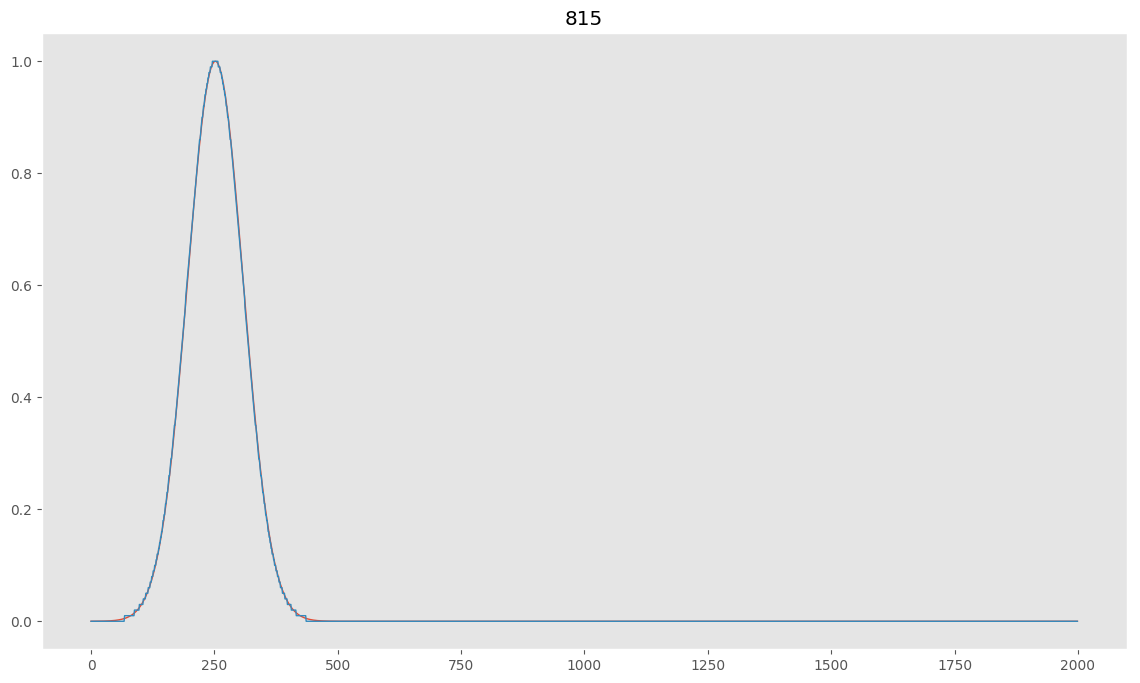

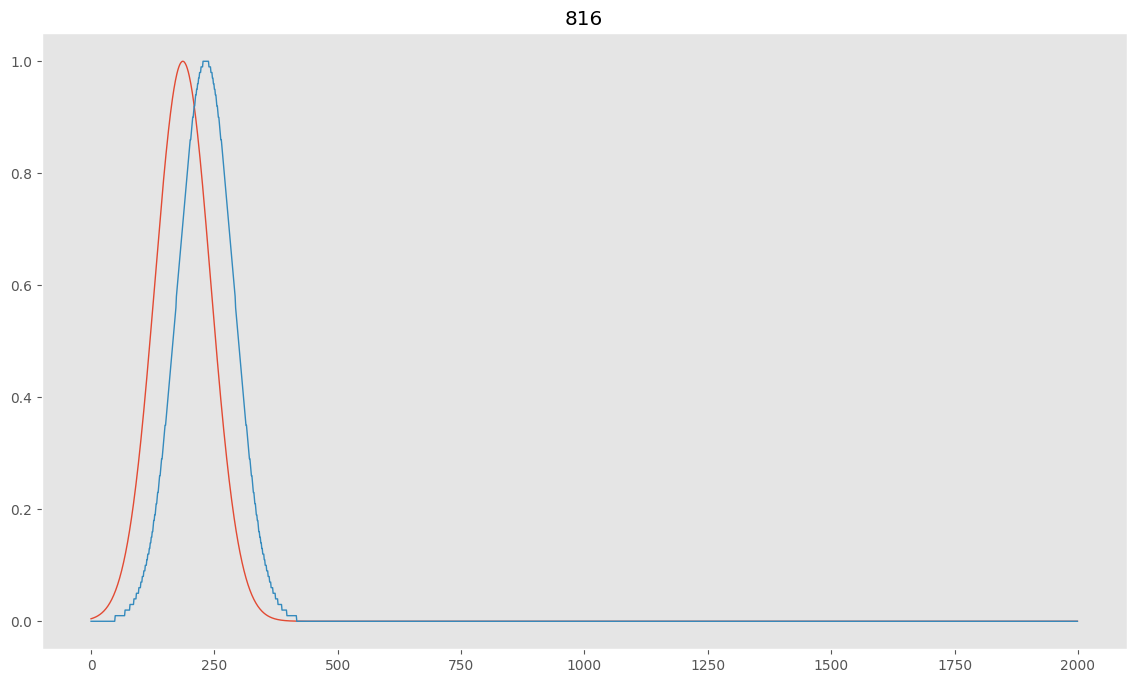

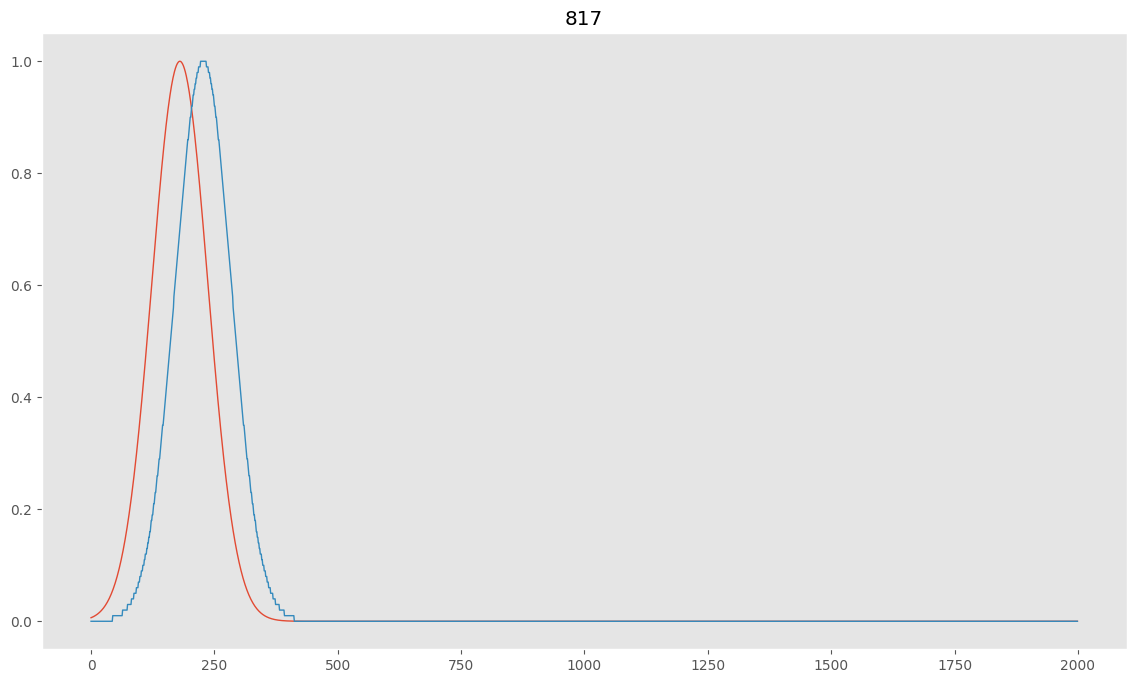

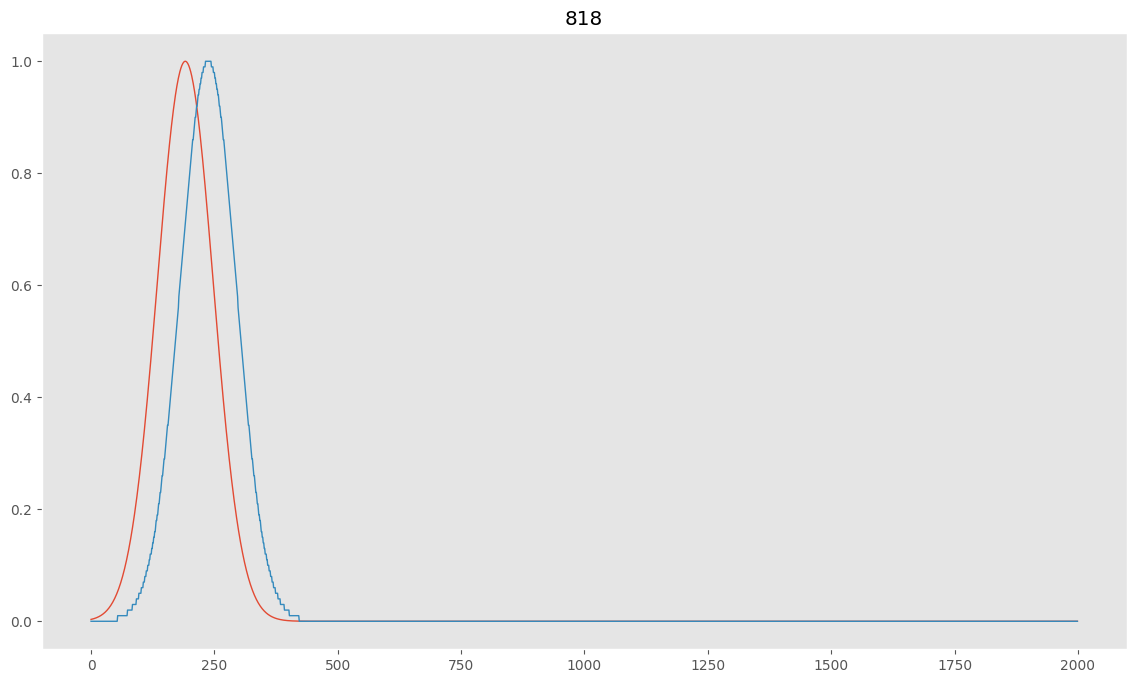

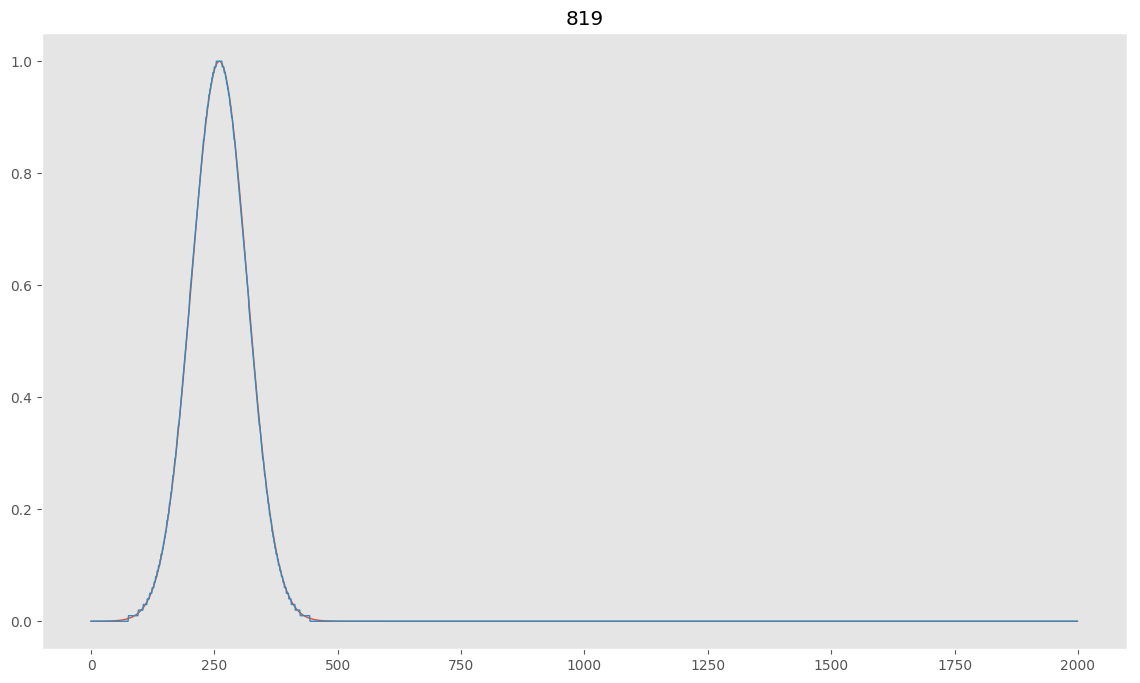

In [143]:
for i in range(815,820):
    plt.figure()
    plt.title(str(i))
    plt.plot(gauss_wins[i,0,:])
    plt.plot(gauss_wins_m[i,0,:])

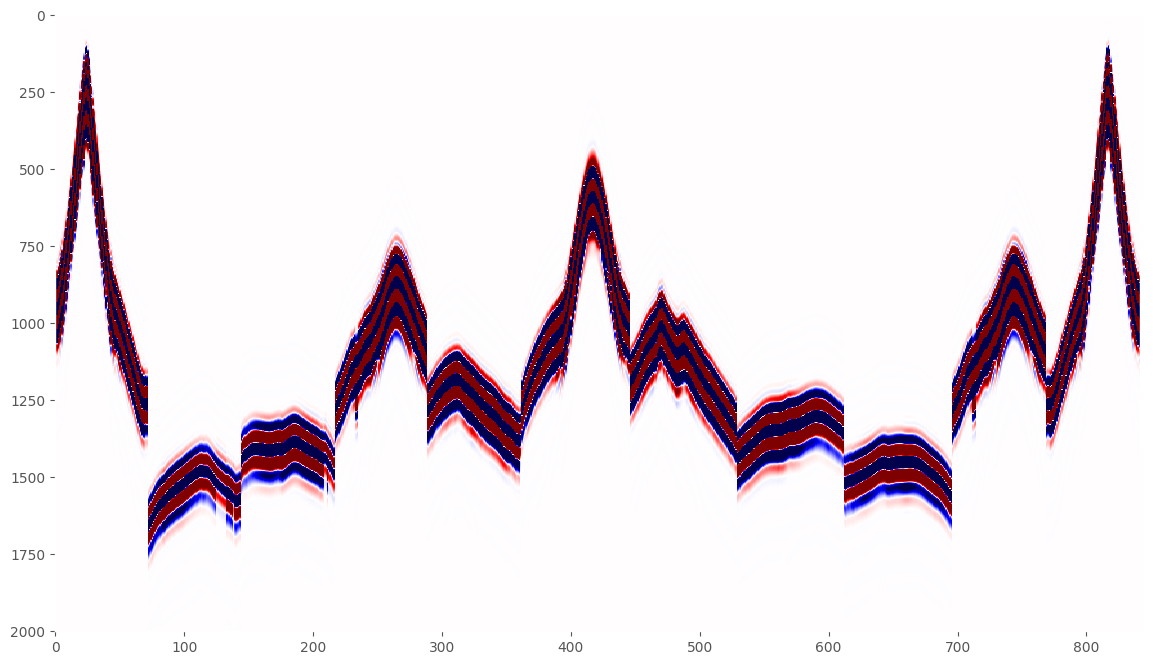

In [84]:
plot(syn_filt, cmap='seismic', clip=.1)    

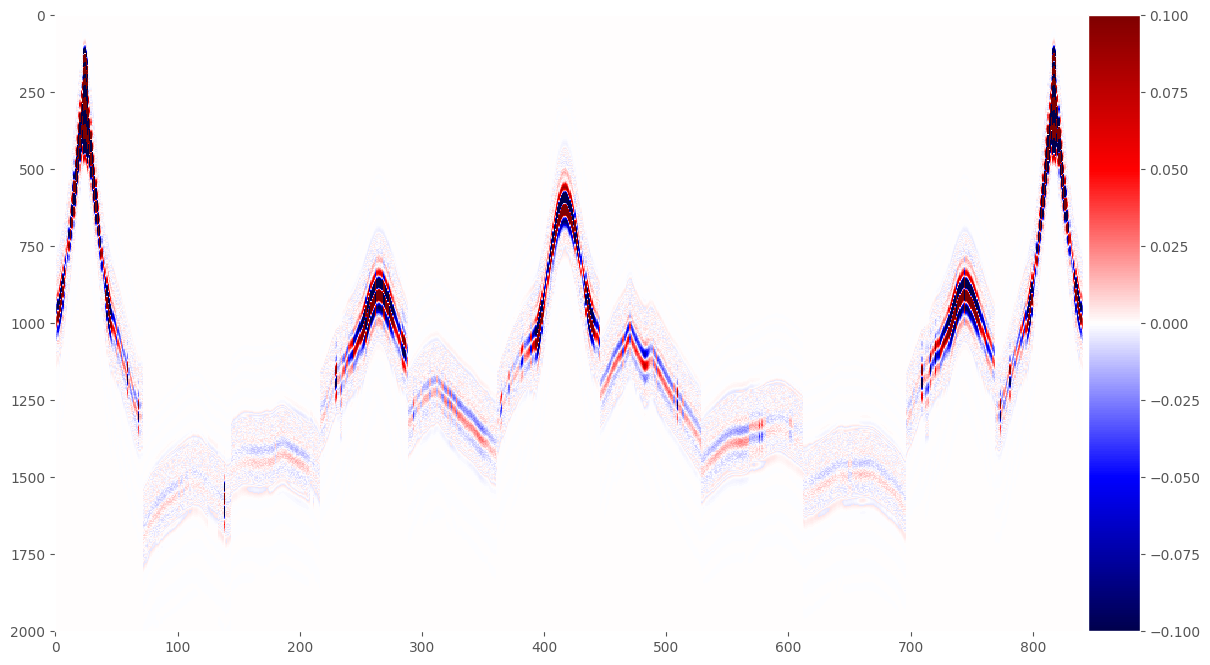

In [81]:
plot(syn_filt-syn_filt_m, cmap='seismic', cbar=1, clip=.1)

In [175]:
syn_phase.shape

(842, 1)

In [176]:
syn_phase = extract_phase(syn, picks, dt=0.0025, freq=2)
obs_phase = extract_phase(obs, picks, dt=0.0025, freq=2)
dif_phase = np.zeros(syn_phase.shape) 
dif_phase[:, 0] = [wrap_phase(i) for i in (syn_phase - obs_phase)[:,0]]

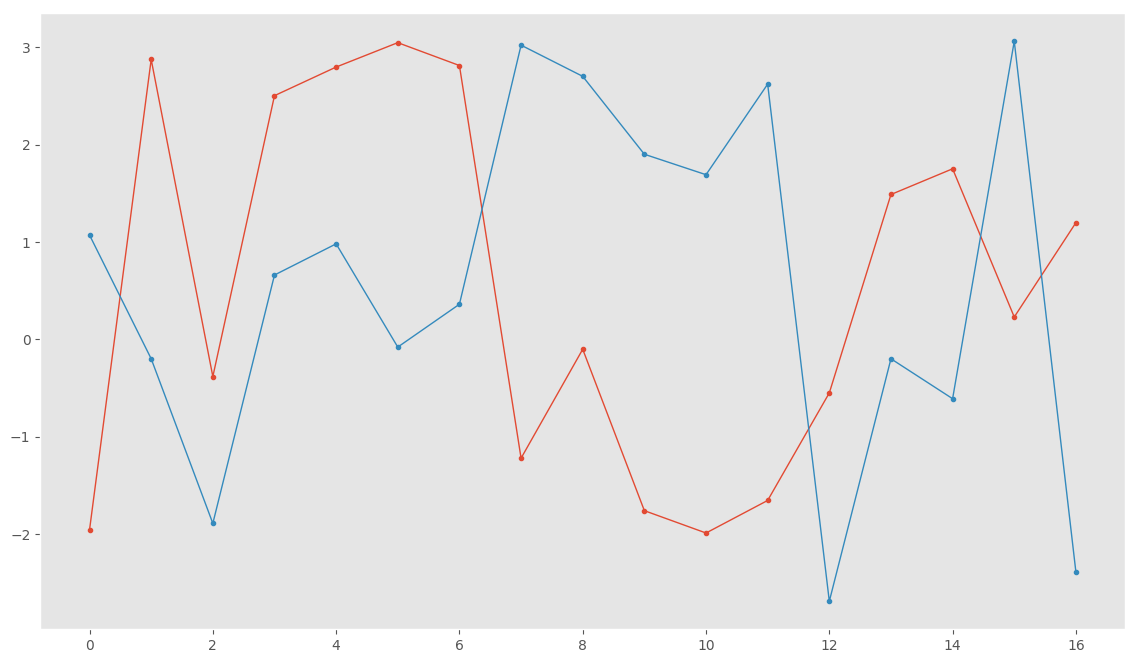

In [168]:
skip = 50
plt.plot(syn_phase[::skip], '.-')
plt.plot(syn_phase_m[::skip], '.-')

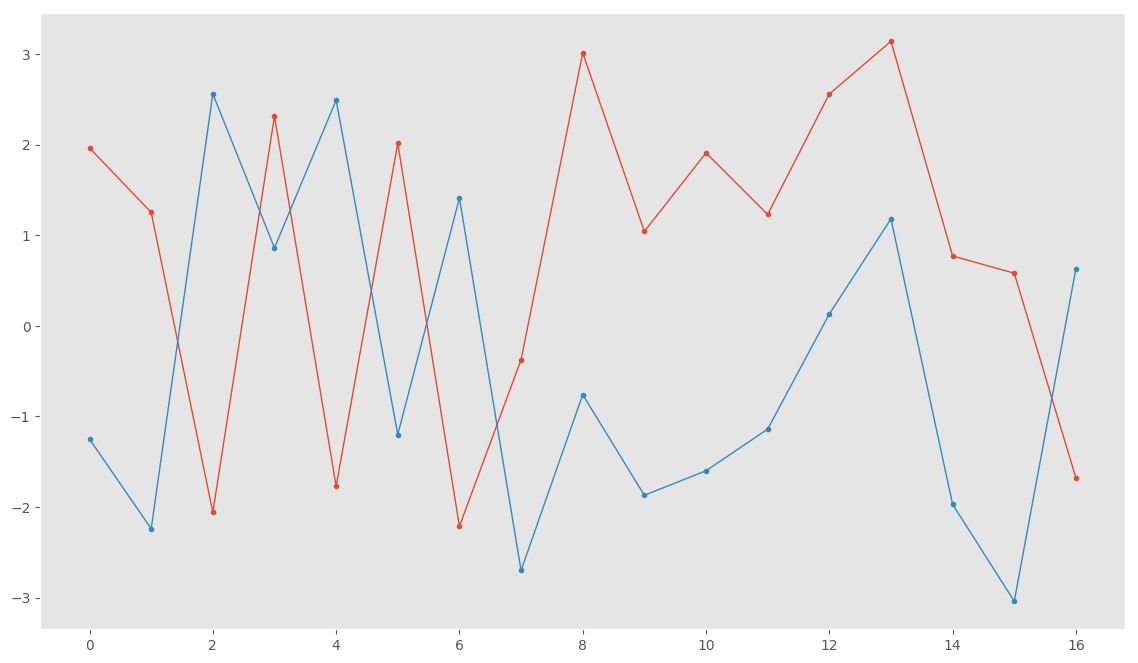

In [167]:
skip = 50
plt.plot(obs_phase[::skip], '.-')
plt.plot(obs_phase_m[::skip], '.-')

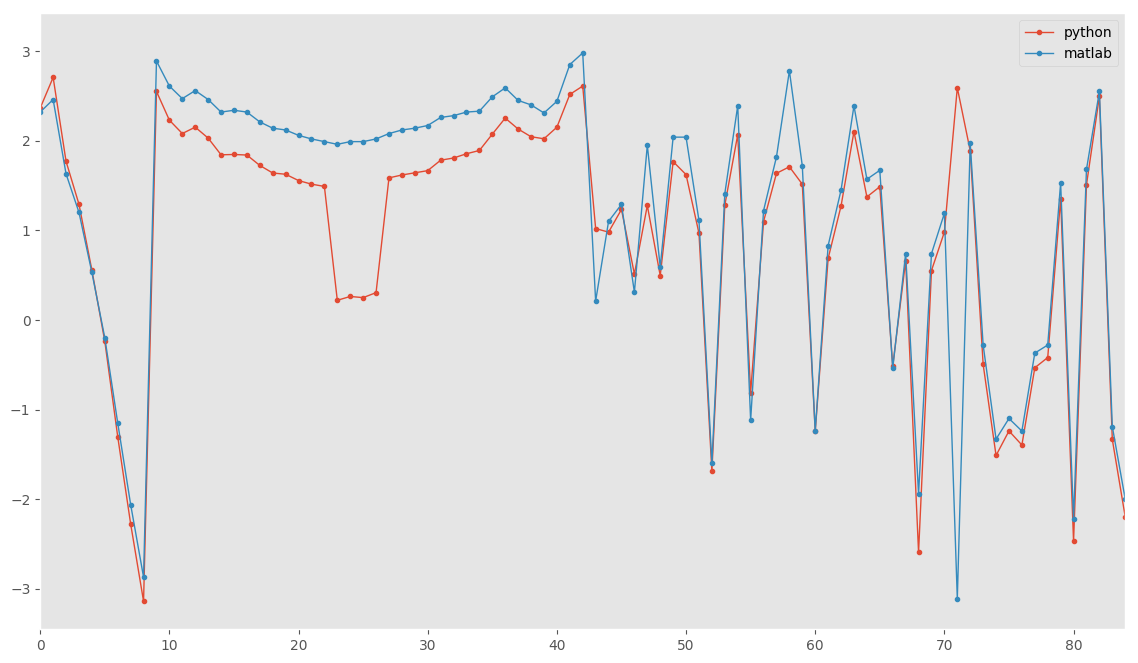

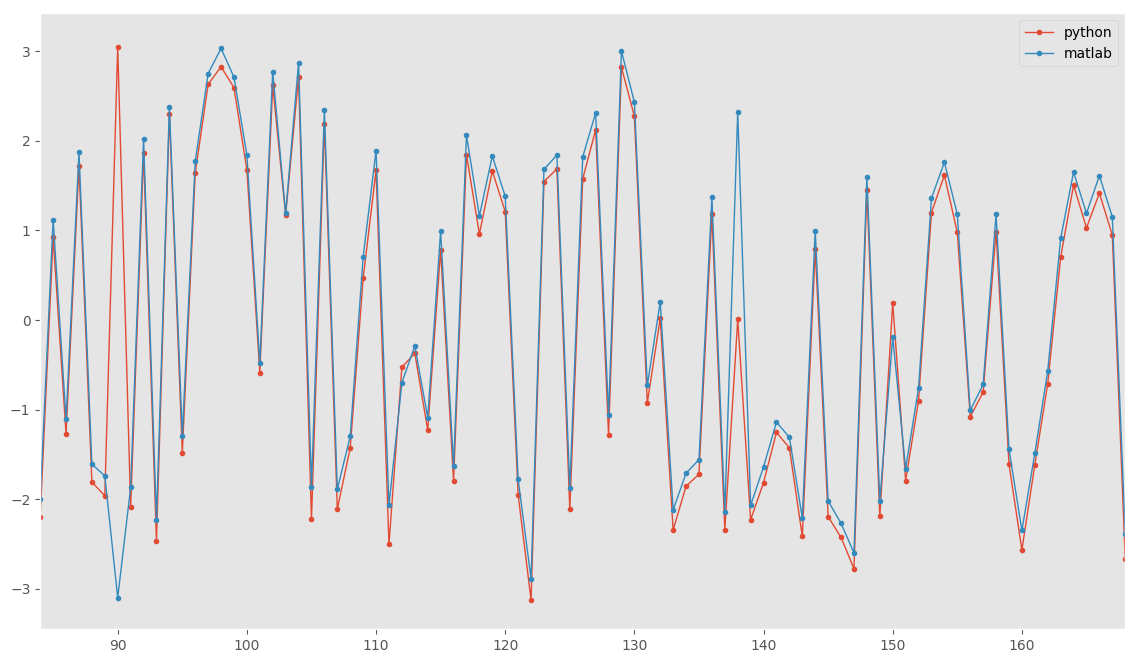

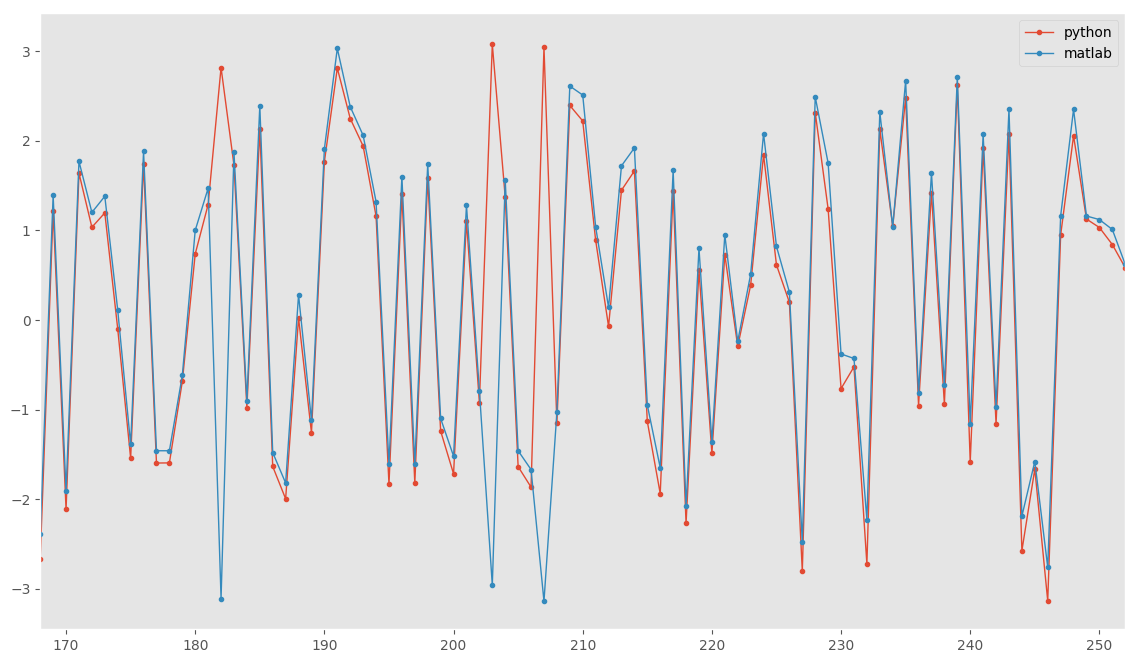

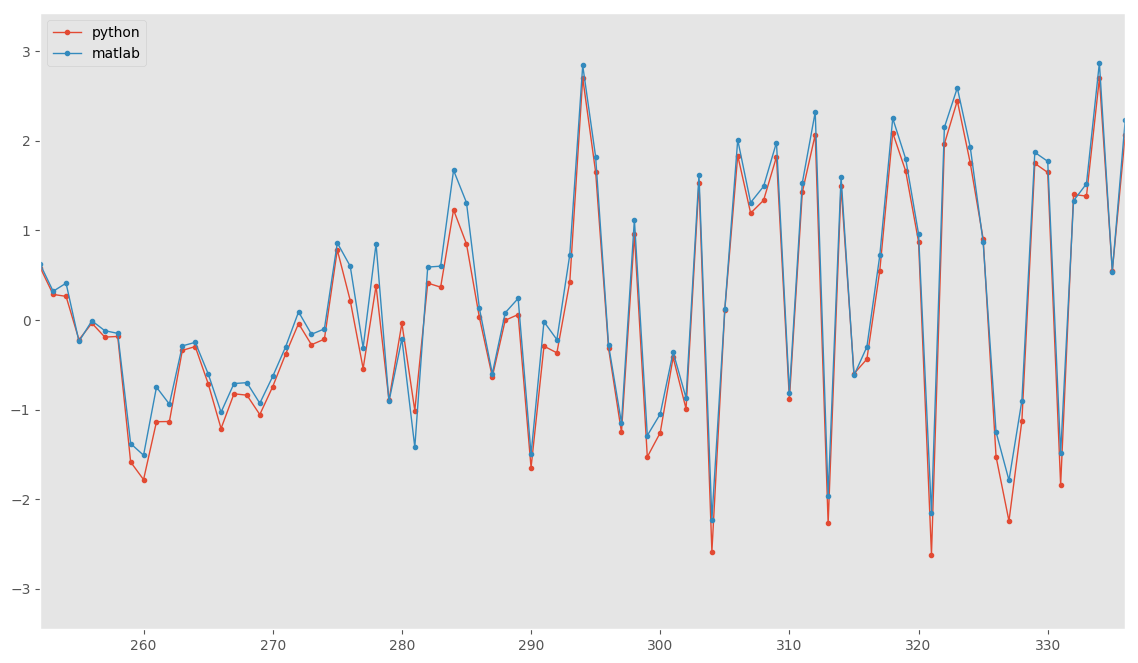

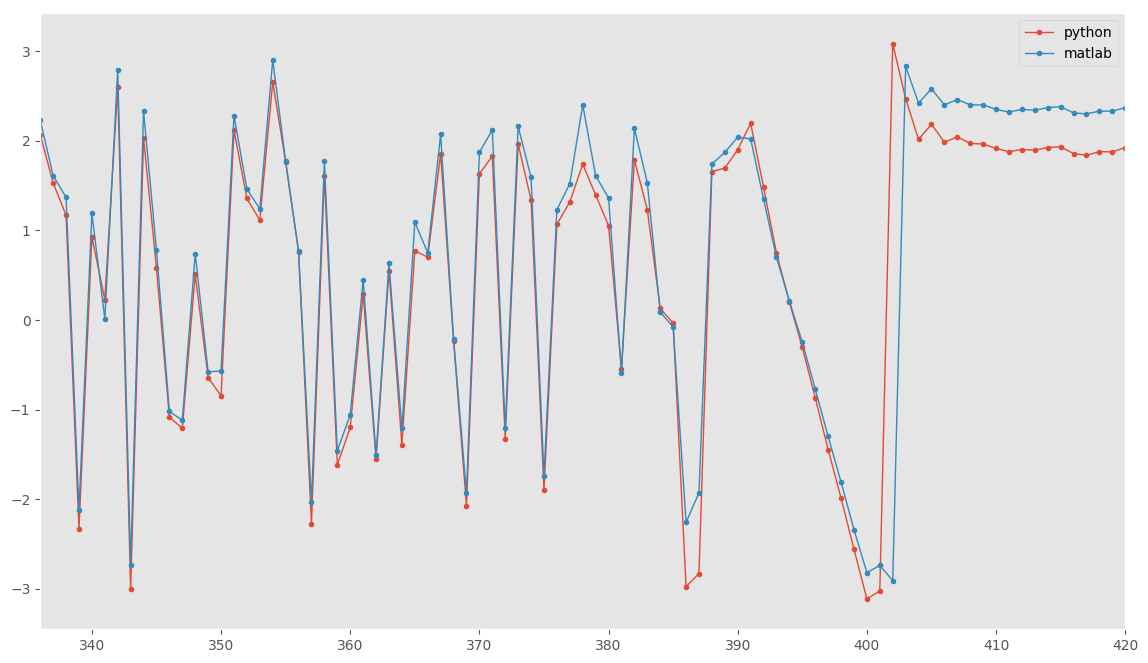

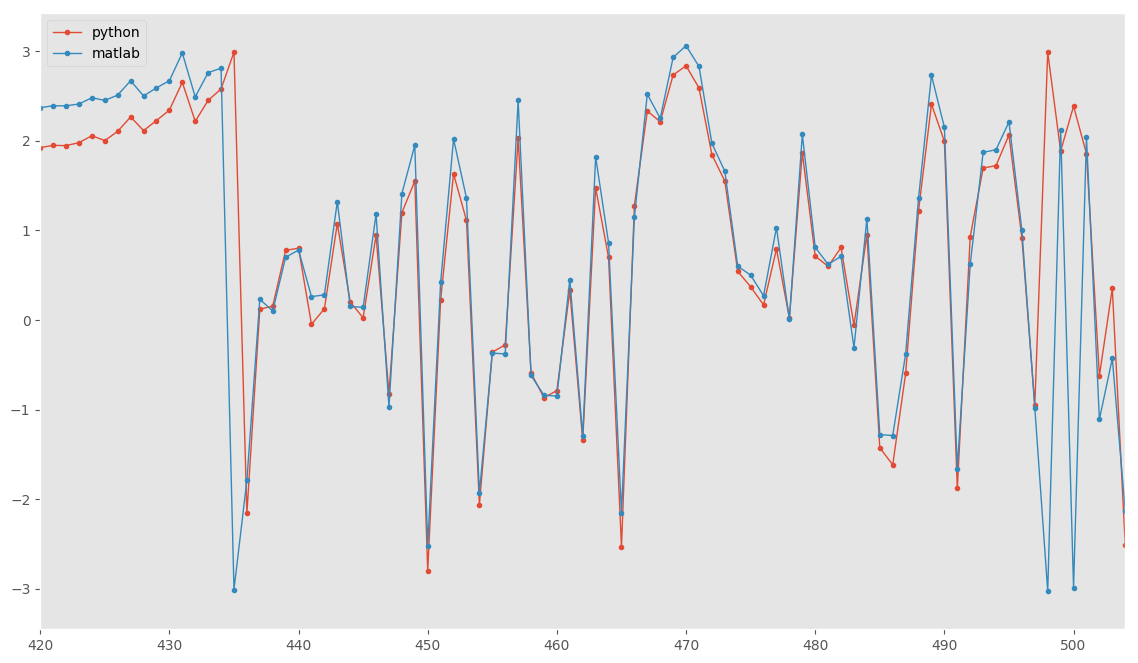

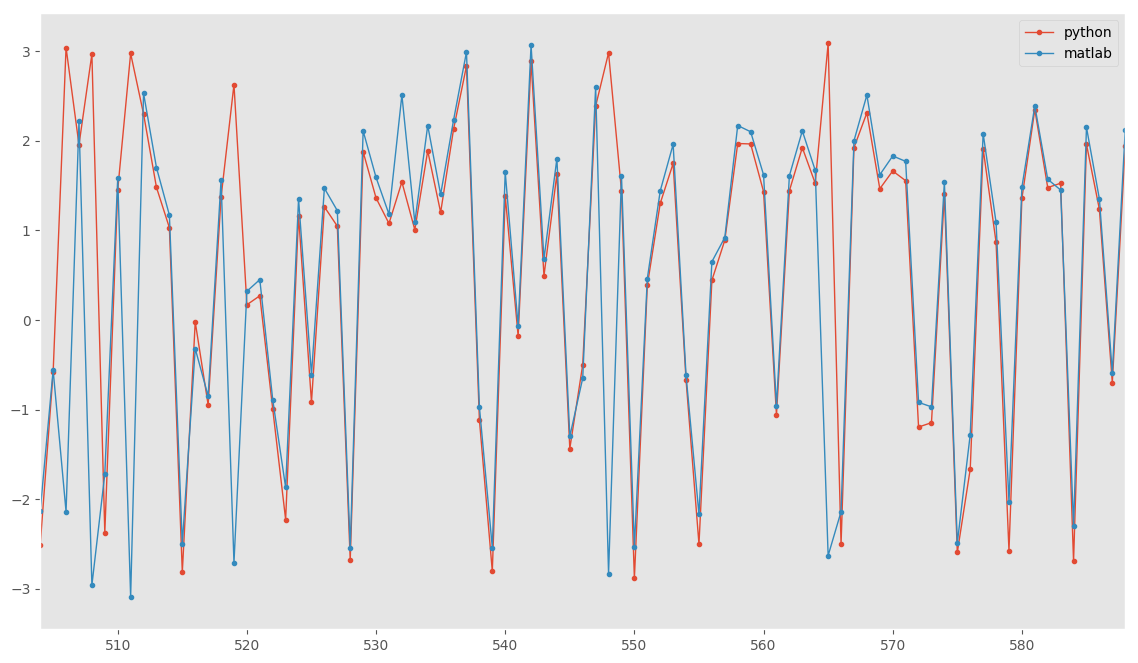

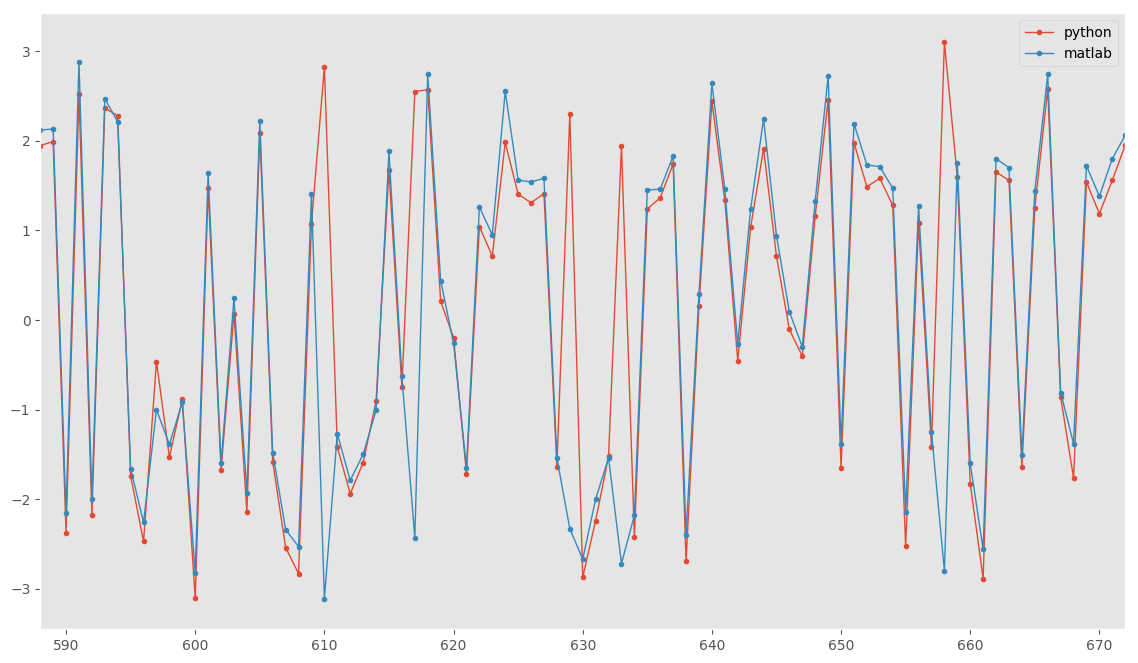

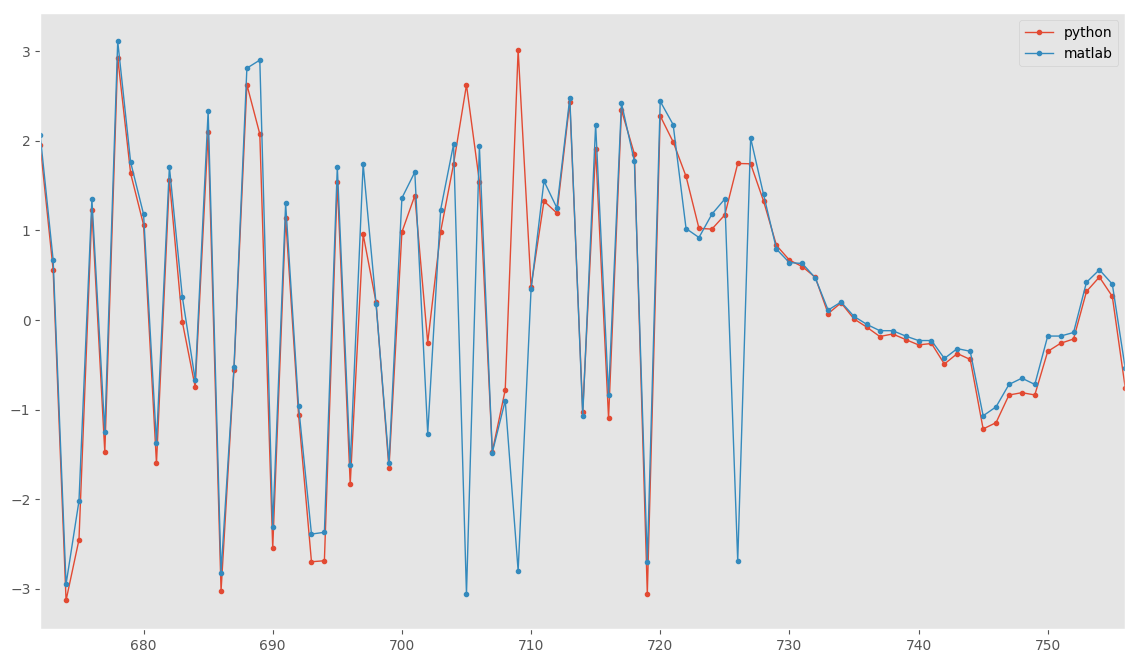

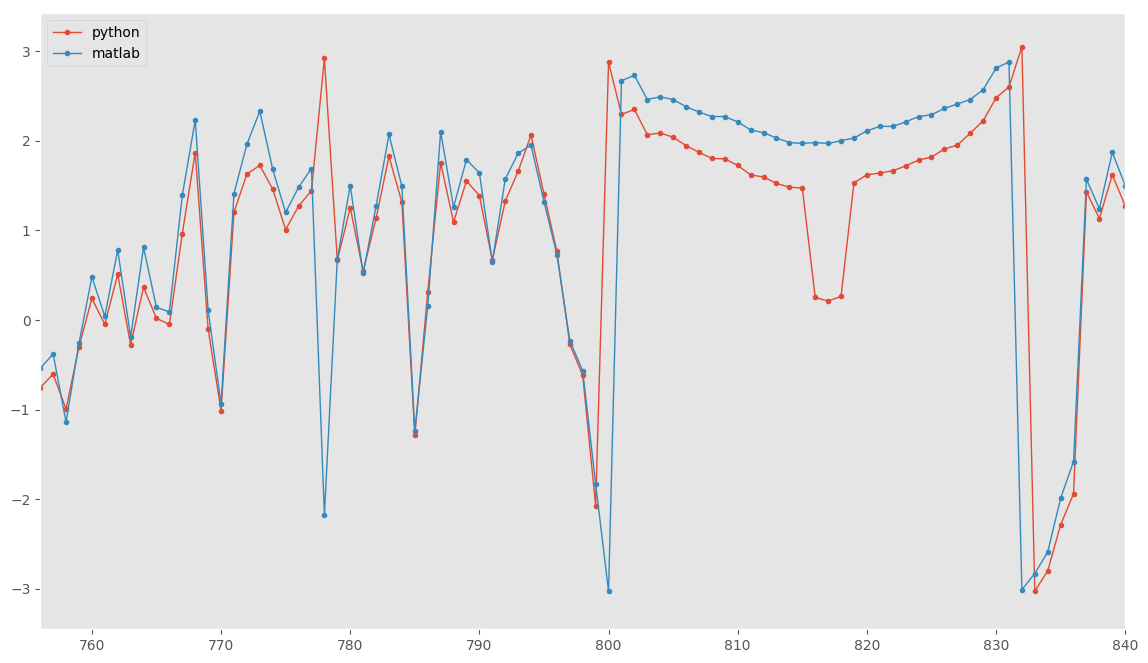

In [181]:
n = 10
l = len(dif_phase) // n
for i in range(n):
    skip = 1
    plt.figure()
    plt.plot(dif_phase[::skip], '.-', label='python')
    plt.plot(dif_phase_m[::skip], '.-', label='matlab')
    plt.legend()
    plt.xlim(i*l, (i+1)*l)

# Synthetic data

First  case: 2D, SEGY.    

## Diffractor, 2D, SEGY

### Syn

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p01/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.0001 of the max amplitude of the trace.


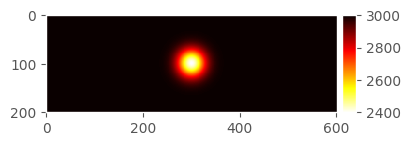

In [4]:
dims = [601, 1, 201] # nodes
dx = 20 # m
dt = 0.001 # s
ns = 4000 # samples
proj = ProjSynVsObs('p01', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
proj.env['SLAVES_WAVEFIELDSVTR'] = -100


nx, ny, nz = dims
x0, y0, z0 = np.array(dims) // 2
r = 20
# amp = -1000
vp_bg = np.zeros(dims) + 3000
vp  = np.zeros(dims)
for x in range(nx):
    for y in range(ny):
        for z in range(nz):
            dist = np.sqrt((x - x0)**2 + (y - y0)**2 + (z - z0)**2)
#             if dist <= r:
#                 vp[x,y,z] += amp
            vp[x,y,z] = vp_bg[x,y,z] - 0.2 * vp_bg[x,y,z] * np.exp(-dist**2/(2*r**2))
plot(vp, center_cmap=0, cmap='hot_r', cbar=1)
plt.gca().set_aspect('equal')        
array2sgy(proj.inp.truevp.fname, vp, dt=dx)


from fullwavepy.signalproc.wavelet import shift_to_zero
ricker = np.zeros((1,1,ns))
dt = 0.001
fpeak = 5
t = np.arange(-ns//2, ns//2) * dt
p = (np.pi * fpeak * t)**2
ricker[0,0,:] = (1 - 2 * p) * np.exp(-p)
ricker = shift_to_zero(ricker, fraction=1e-4)
array2sgy(proj.inp.rawsign.fname, ricker, dt=dt)

In [128]:
# proj.inp.rawsign.plot(dt=dt)

In [129]:
# proj.inp.rawsign.plot(spect='ampl', dt=dt)
# plt.xlim(0,20)

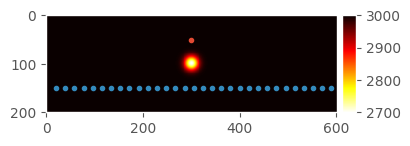

In [246]:
proj.inp.truevp.plot(cmap='hot_r', cbar=1)
plt.gca().set_aspect('equal') 
proj.inp.s.plot('node')
proj.inp.r.plot('node')

In [6]:
# for _ in range(1):
    
#     proj.inp.sp.run(**sp01, cat=0)

#     proj.inp.runfile.prepare(**runfile01, cat=1)
#     proj.inp.bash.prepare(cat=0)
#     proj.run(cat=0)
#     plt.figure()
#     proj.out.synth.plot()

### Inv

In [5]:
proj = ProjInv('p02', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
proj.env['SLAVES_WAVEFIELDSVTR'] = -500

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p02/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [260]:
dupl = 'p01'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
array2sgy(proj.inp.startvp.fname, vp_bg, dt=dx)
proj.inp.sp.prepare(**sp01, cat=0)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(**runfile01, cat=0, 
                         blocks=[{'freq': 3.0, 'nits': 1}])
proj.inp.bash.prepare(ompthreads=8, cat=0)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx

INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...


In [176]:
# proj.env

In [215]:
# proj.out.grad.it[2].plot()
# plt.gca().set_aspect('equal')

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 31  trace(s) as observed data


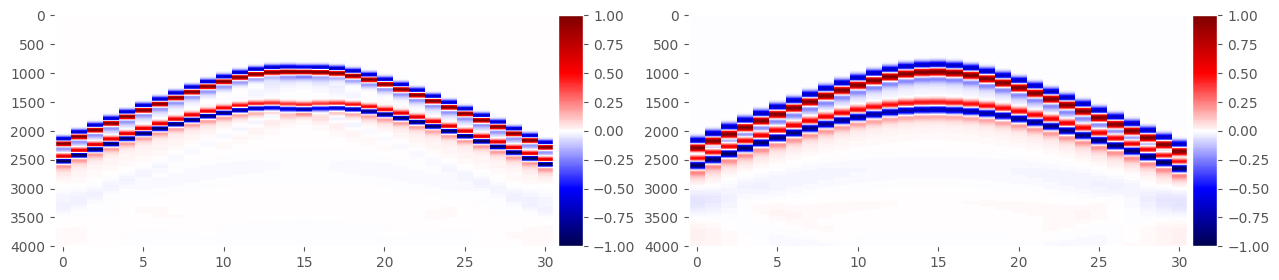

In [264]:
plt.subplots(1,2, figsize=[15,3])
plt.subplot(1,2,1)
plot('p02/inp/p02-Observed.sgy', cmap='seismic', norm='max', cbar=1)
plt.subplot(1,2,2)
proj.out.dumpdat.it[1][1][1].plot(cbar=1, norm='max')

In [267]:
A = read_any(proj.out.dumpdat.it[1][1][1].fname)
A.shape

(63, 1, 4000)

In [268]:
A = A[1: ]
imid = int(len(A) / 2)
Aobs = A[ :imid]
Asyn = A[imid: ]

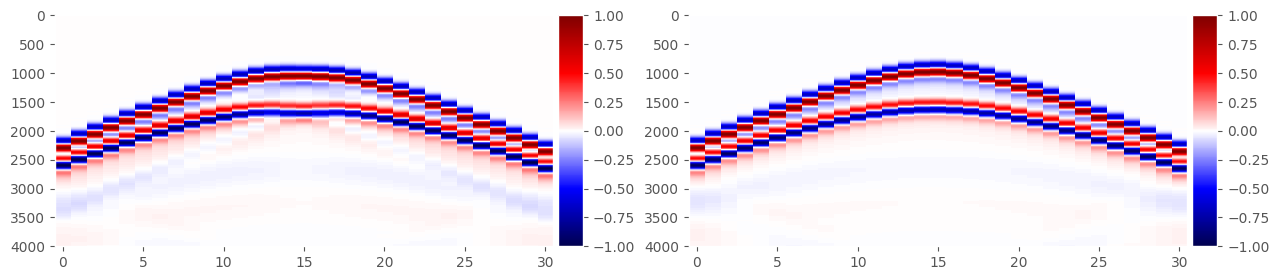

In [269]:
plt.subplots(1,2, figsize=[15,3])
plt.subplot(1,2,1)
plot(Aobs, cmap='seismic', norm='max', cbar=1)
plt.subplot(1,2,2)
plot(Asyn, cmap='seismic', norm='max', cbar=1)

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


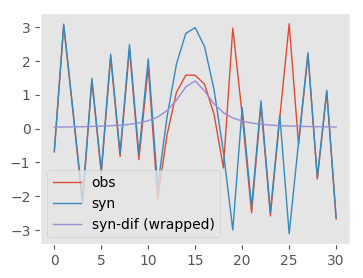

In [299]:
freq = 5
picks = first_breaks(Asyn, fraction=1e-2) # only from syn
phobs = extract_phase(Aobs, picks, dt, freq).ravel()
phsyn = extract_phase(Asyn, picks, dt, freq).ravel()
phdif = [wrap_phase(i) for i in phsyn-phobs]
plt.plot(phobs, label='obs')
plt.plot(phsyn, label='syn')
plt.plot(phdif, label='syn-dif (wrapped)')
plt.legend()

#### new phase plotting

In [49]:
ph = proj.out.dumpdat.it[1][1][1]._get_phase(freq=2).ravel()
ph.shape

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 31  trace(s) as observed data
INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


(31,)

In [ ]:
from fullwavepy.plot.oned import _slice_points, _plot_points 
s, r = proj.out.dumpdat.it[1][1][1].plot_phase(freq=5)
r = _slice_points(r, 'y')
_plot_points(r, scatt_ampl=ph)

INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p02//inp/p02-Observed.hed


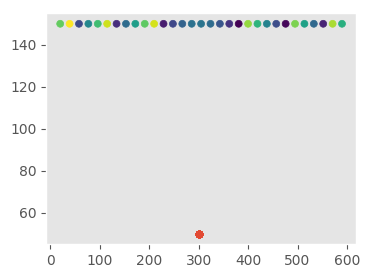

In [50]:
from fullwavepy.plot.oned import _slice_points, _plot_points 
s, r = proj.out.dumpdat.it[1][1][1].plot_phase(freq=5)
r = _slice_points(r, 'y')
_plot_points(_slice_points(s, 'y')) 
_plot_points(r, scatt_ampl=ph)

In [46]:
r

[(20.0, 150.0),
 (39.0, 150.0),
 (58.0, 150.0),
 (77.0, 150.0),
 (96.0, 150.0),
 (115.0, 150.0),
 (134.0, 150.0),
 (153.0, 150.0),
 (172.0, 150.0),
 (191.0, 150.0),
 (210.0, 150.0),
 (229.0, 150.0),
 (248.0, 150.0),
 (267.0, 150.0),
 (286.0, 150.0),
 (305.0, 150.0),
 (324.0, 150.0),
 (343.0, 150.0),
 (362.0, 150.0),
 (381.0, 150.0),
 (400.0, 150.0),
 (419.0, 150.0),
 (438.0, 150.0),
 (457.0, 150.0),
 (476.0, 150.0),
 (495.0, 150.0),
 (514.0, 150.0),
 (533.0, 150.0),
 (552.0, 150.0),
 (571.0, 150.0),
 (590.0, 150.0)]

## Same as above, but cleaned

### Set paths to executables

In [2]:
exe = {'fullwave':       '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',                           # run via PBS
       'fullwave_local': '/home/kmc3817/light_PhD/fullwave3D/rev690/bin/fullwave3D.exe',         # run locally
       'segyprep':       '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16', # run locally
      }

### Define time and space discretization

In [52]:
dims = [601, 1, 201]  # grid dimensions      [nodes]
dx = 20               # grid-cell size       [metres]
dt = 0.001            # time-interval        [seconds]
ns = 4000             # no. of time-samples  [-]

### Set environment variables

The variables not defined here will have default values specific to a project-type chosen. You can check

In [5]:
env = {'SCHEDULER_SHOWLEVEL': 1,
       'SLAVES_WAVEFIELDSVTR': -100,
      }  

### Initialize a project

We chose ProjSyn to generate synthetic data.

In [53]:
proj = ProjInv('p03', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p03/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [14]:
dupl = 'p01'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
array2sgy(proj.inp.startvp.fname, vp_bg, dt=dx)
proj.inp.sp.prepare(**sp01, cat=0)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(**runfile01, cat=0, 
                         blocks=[{'freq': 3.0, 'nits': 1}])
proj.inp.bash.prepare(ompthreads=8, cat=0)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
!cd {proj.inp.path}; cp {proj.name}-Template.hed {proj.name}-Observed.hed
proj.run()
proj.out.synth.plot()

INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p03-*Synthetic*': No such file or directory
mv: cannot stat 'p03-*Observed-Time*': No such file or directory
mv: cannot stat 'p03-*iter*': No such file or directory



In [17]:
D = proj.out.dumpdat.it[1][1].read()
D.shape

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 31  trace(s) as observed data


(31, 4000)

In [10]:
a, b, c = proj.out.dumpcomp.it[1][1].read()

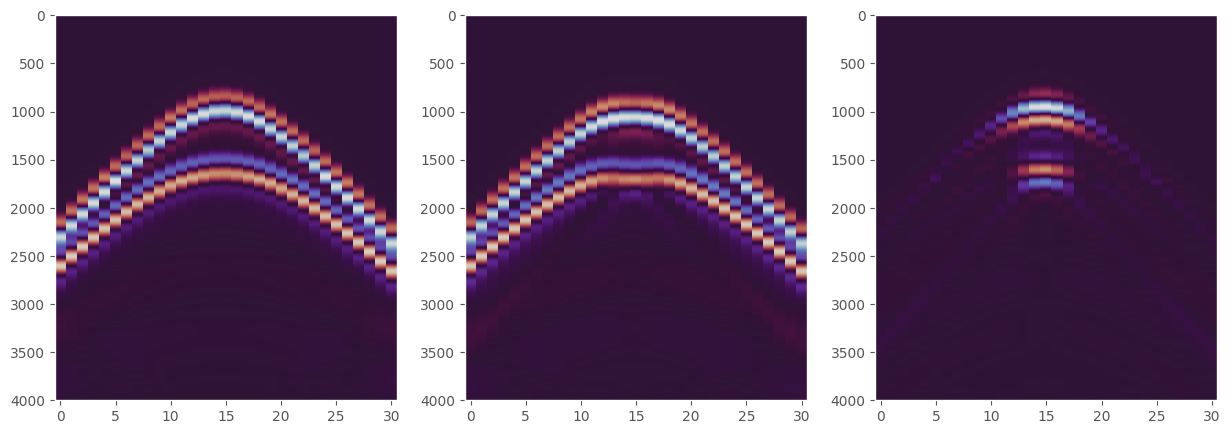

In [6]:
proj.out.dumpcomp.it[1][1].plot()

In [7]:
ps, po, pd = proj.out.dumpcomp.it[1][1]._get_phase(freq=5)

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


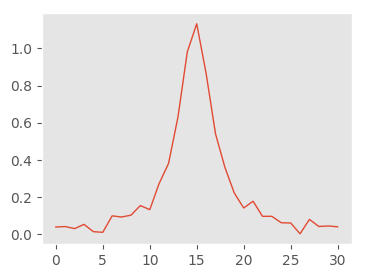

In [9]:
plt.plot(pd[:,0])

INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p03//inp/p03-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


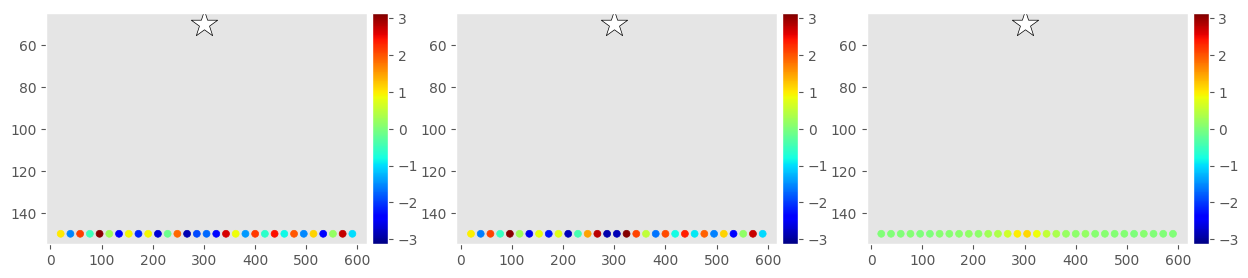

In [13]:
proj.out.dumpcomp.it[1][1].plot_phase(freq=5)

## Same as above, but cleaned

Results of inversions are not satisfactory.

In [4]:
dims = [101, 1, 101]
dx = 20
dt = 0.001
ns = 1000

### Syn

In [5]:
proj = ProjSyn('p06', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p06/


INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False

INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping


INFO:fullwavepy.generic.array.slice_array: Sliced at svalue=0 node of scoord=y axis


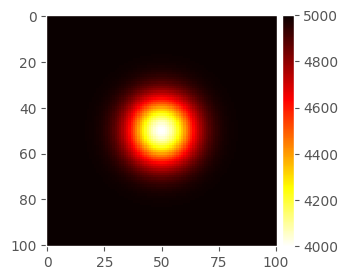

In [6]:
nx, ny, nz = dims
x0, y0, z0 = np.array(dims) // 2
r = 10
anom = -0.2 # of the background 
vp_bg = np.zeros(dims) + 5000
vp  = np.zeros(dims)
for x in range(nx):
    for y in range(ny):
        for z in range(nz):
            dist = np.sqrt((x - x0)**2 + (y - y0)**2 + (z - z0)**2)
            vp[x,y,z] = vp_bg[x,y,z] + anom * vp_bg[x,y,z] * np.exp(-dist**2/(2*r**2))
plot(vp, center_cmap=0, cmap='hot_r', cbar=1)
plt.gca().set_aspect('equal')        
array2sgy(proj.inp.truevp.fname, vp, dt=dx)

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.0001 of the max amplitude of the trace.


(0, 20)

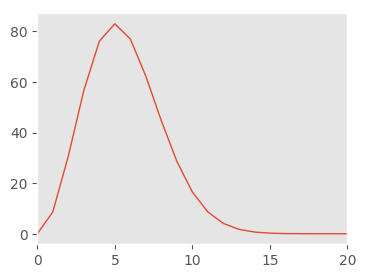

In [56]:
from fullwavepy.signalproc.wavelet import shift_to_zero
ricker = np.zeros((1,1,ns))
fpeak = 5
t = np.arange(-ns//2, ns//2) * dt
p = (np.pi * fpeak * t)**2
ricker[0,0,:] = (1 - 2 * p) * np.exp(-p)
ricker = shift_to_zero(ricker, fraction=1e-4)
array2sgy(proj.inp.rawsign.fname, ricker, dt=dt)
proj.inp.rawsign.plot(spect='ampl', dt=dt)
plt.xlim(0,20)

In [ ]:
sp06 = {'geometry': 'regular', 'geometry_in_nodes': True,
        'souz': 10, 'soux0': 2, 'soudx': 5, 'sounx': 100,
        'recz': 90, 'recx0': 2, 'recdx': 5, 'recnx': 100}

runfile06 = {'btop': 10, 'etop': 20, 'b_abs': 10, 'e_abs': 20, 'dim': '2D'}

INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...


INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p06-*DUMP*': No such file or directory
mv: cannot stat 'p06-*CP*': No such file or directory



Function run took 8.694491068832576 s to run


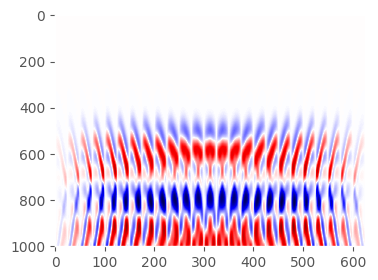

In [21]:
proj.inp.sp.prepare(**sp06, cat=0)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(**runfile06, cat=0)
proj.inp.bash.prepare(ompthreads=8, cat=0)
proj.run(timer=1, cat=0)
proj.out.synth.plot()

### Inv

In [18]:
pname = 'p07'
proj = ProjInv(pname, io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
proj.env['SLAVES_DUMPDAT'] = None
proj.env['SLAVES_DUMPCOMPARE'] = None

dupl = 'p06'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
array2sgy(proj.inp.startvp.fname, vp_bg, dt=dx) # NOTE
proj.inp.sp.prepare(**sp06, cat=0)
proj.inp.sp.run(cat=0)

for f0 in np.arange(2,7,2):
    suffix = 'f0_' + str(f0)
    print(suffix)
    proj.inp.runfile.prepare(**runfile06, cat=0, 
                             blocks=[{'freq': f0+0, 'nits': 20},
                                     {'freq': f0+1, 'nits': 20},
                                     {'freq': f0+2, 'nits': 20},
                                     {'freq': f0+3, 'nits': 20}])
    proj.inp.bash.prepare(ompthreads=8, cat=0)
    !cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
    !cd {proj.inp.path}; cp {proj.name}-Template.hed {proj.name}-Observed.hed
    proj.run(timer=1, cat=0)
    proj = ProjInv(pname, io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
    proj.out.vp.plot_all(suffix=suffix)
    proj.out.grad.plot_all(suffix=suffix)    

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p07/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
f0_2
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p07-*Synthetic*': No such file or directory
mv: cannot stat 'p07-*Observed-Time*': No such file or directory
mv: cannot stat 'p07-*DUMP*': No such file or directory
mv: cannot stat 'p07-*iter*': No such file or directory



Function run took 876.6173997921869 s to run
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p07/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



f0_4
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p07-*Synthetic*': No such file or directory
mv: cannot stat 'p07-*Observed-Time*': No such file or directory
mv: cannot stat 'p07-*iter*': No such file or directory



Function run took 867.1640993701294 s to run
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p07/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



f0_6
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p07-*Synthetic*': No such file or directory
mv: cannot stat 'p07-*Observed-Time*': No such file or directory
mv: cannot stat 'p07-*iter*': No such file or directory



Function run took 846.0517202988267 s to run
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p07/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



## Homog, 3D, SEGY

### Syn

In [12]:
dims = [101, 61, 31]   # nodes
nx, ny, nz = dims
dx = 50                # m
dt = 0.001             # s
ns = 2000              # samples

In [25]:
vp_true = 3000

proj = ProjSyn('p04', io='sgy', dim='3D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
proj.inp.truevp.prepare(vel=vp_true)
# proj.inp.truevp.plot(cbar=1)
# proj.inp.rawsign.prepare(source='p03/inp/p03-RawSign.sgy')
# # proj.inp.rawsign.plot()
sp04 = {'geometry': 'regular', 'geometry_in_nodes': True,
        'soux0': nx//2, 'soudx': 2, 'sounx': 1, 'souy0': ny//2, 'soudy': 2, 'souny': 1, 'souz': nz//2, 
        'recx0': 2, 'recdx': 4, 'recnx': 100, 'recy0': 3, 'recdy': 4, 'recny': 100, 'recz': nz//2} 
proj.inp.sp.prepare(**sp04, cat=0)
proj.inp.sp.run(cat=0)
runfile04 = {'b_abs': 20, 'e_abs': 30, 'dim': '3D'}
proj.inp.runfile.prepare(**runfile04, cat=0)
proj.inp.bash.prepare(cat=0)
proj.run(timer=1, cat=0)
#     plt.figure()
#     proj.out.synth.plot()




INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p04/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.projfiles.ProjFile.create: Creating ./p04//inp/p04-TrueVp.sgy...


INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...


INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p04-*DUMP*': No such file or directory
mv: cannot stat 'p04-*CP*': No such file or directory



Function run took 21.037744514644146 s to run


### Inv

In [8]:
proj = ProjInv('p05', io='sgy', dim='3D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p05/


INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False

INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping


INFO:fullwavepy.ioapi.su.sugethw: Getting fldr values from ./p05//inp/p05-Observed.sgy header


Function sugethw() took 0.09645142778754234 s to run
INFO:fullwavepy.project.datafiles.DataFileSgy.files: Creating instances of <class 'fullwavepy.project.datafiles.ObsDataFileSgy'>...
Function files() took 0.09987900871783495 s to run


INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


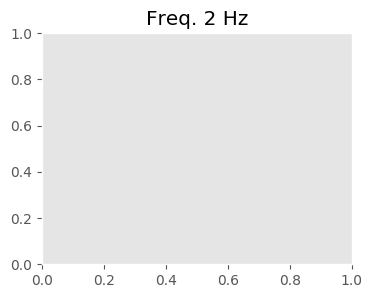

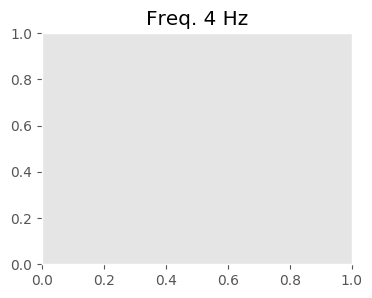

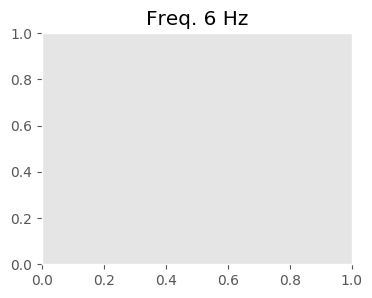

In [10]:
for freq in [2,4,6]:
    plt.figure()
    plt.title('Freq. ' + str(freq) + ' Hz')
    proj.out.dumpcomp.it[1][1].plot_phase(freq=freq)
    plt.savefig('freq'+str(freq))
    plt.close()

In [20]:
# dupl = 'p04'
# proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
# proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
# proj.inp.startvp.prepare(vel=vp_true+5000)
# proj.inp.sp.prepare(**sp04, cat=0)
# proj.inp.sp.run(cat=1)
# proj.inp.runfile.prepare(**runfile04, cat=0, 
#                          blocks=[{'freq': 3.0, 'nits': 1}])
# proj.inp.bash.prepare(ompthreads=8, cat=0)
# !cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
# !cd {proj.inp.path}; cp {proj.name}-Template.hed {proj.name}-Observed.hed
# proj.run(timer=1, cat=0)

INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


<Figure size 400x300 with 0 Axes>

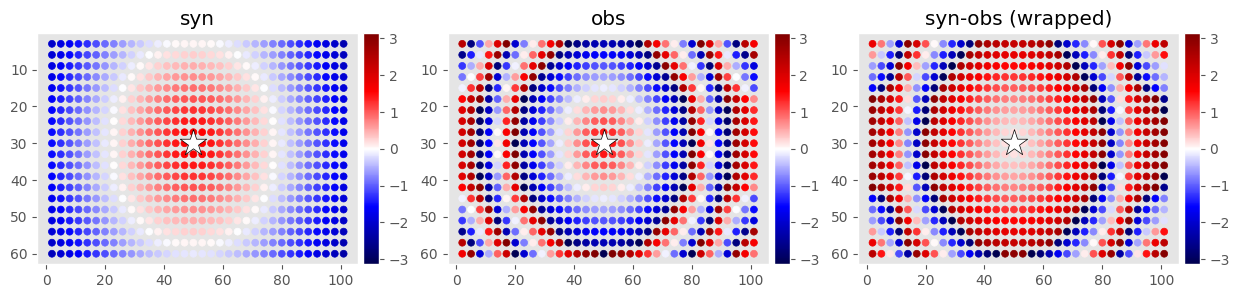

<Figure size 400x300 with 0 Axes>

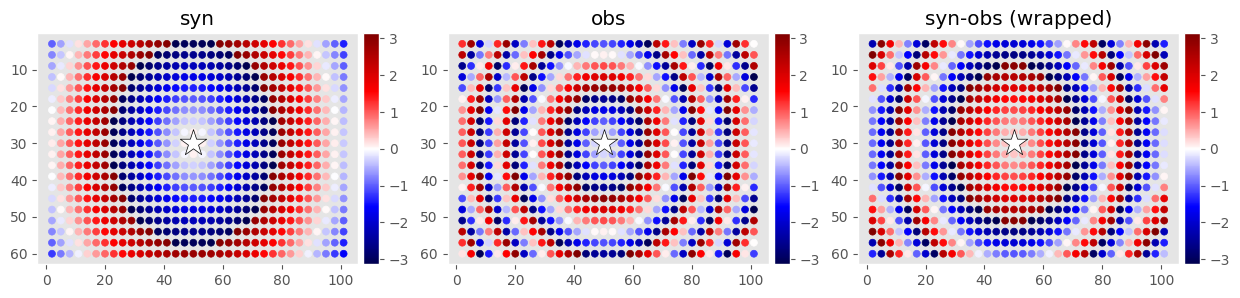

<Figure size 400x300 with 0 Axes>

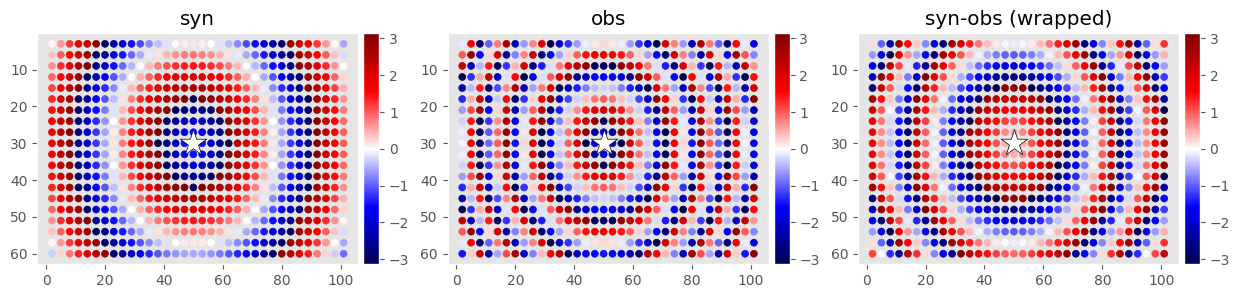

In [33]:
for freq in [2,4,6]:
    plt.figure()
    proj.out.dumpcomp.it[1][1].plot_phase(freq=freq, scatt_cmap='seismic')

INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


INFO:fullwavepy.ioapi.fw3d.TtrFile._get_sr_coords: Reading ./p05//inp/p05-Observed.hed


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


<Figure size 400x300 with 0 Axes>

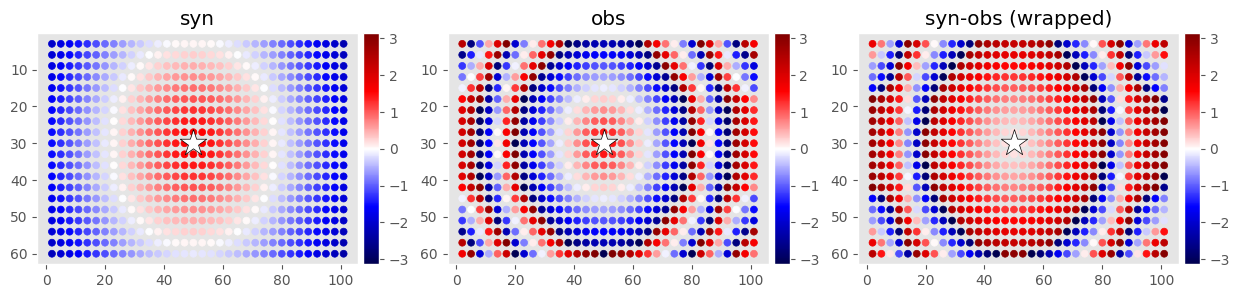

<Figure size 400x300 with 0 Axes>

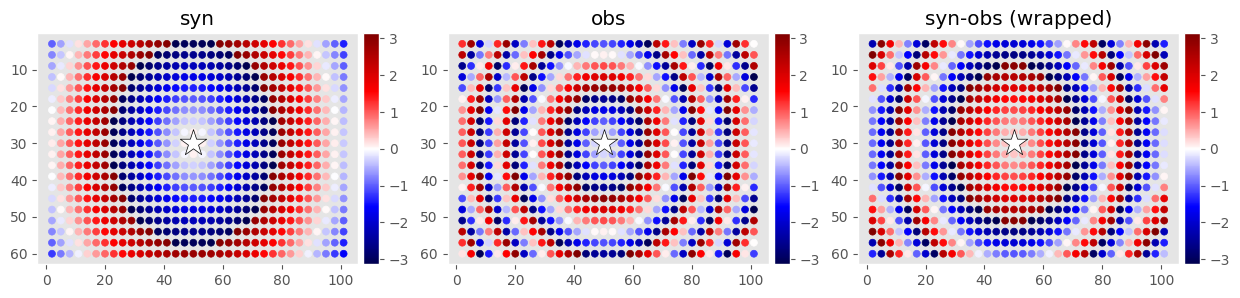

<Figure size 400x300 with 0 Axes>

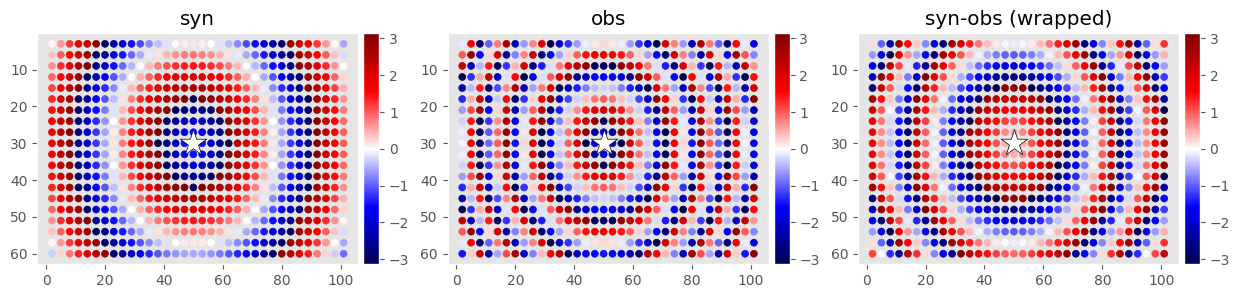

In [33]:
for freq in [2,4,6]:
    plt.figure()
    proj.out.dumpcomp.it[1][1].plot_phase(freq=freq, scatt_cmap='seismic')

## ...

# Manual picking of scatter points

## Homog, 3D, SEGY

Working on the exisiting project.

In [13]:
proj = ProjInv('p05', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p05/


INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False

INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping


INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr
INFO:fullwavepy.project.datafiles.DumpCompareFile.read: Reading ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr...


INFO:fullwavepy.project.datafiles.DumpCompareFile.read: Reading ./p05//out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr...


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: RMS of wrapped phase-differences: 1.8305293639848268


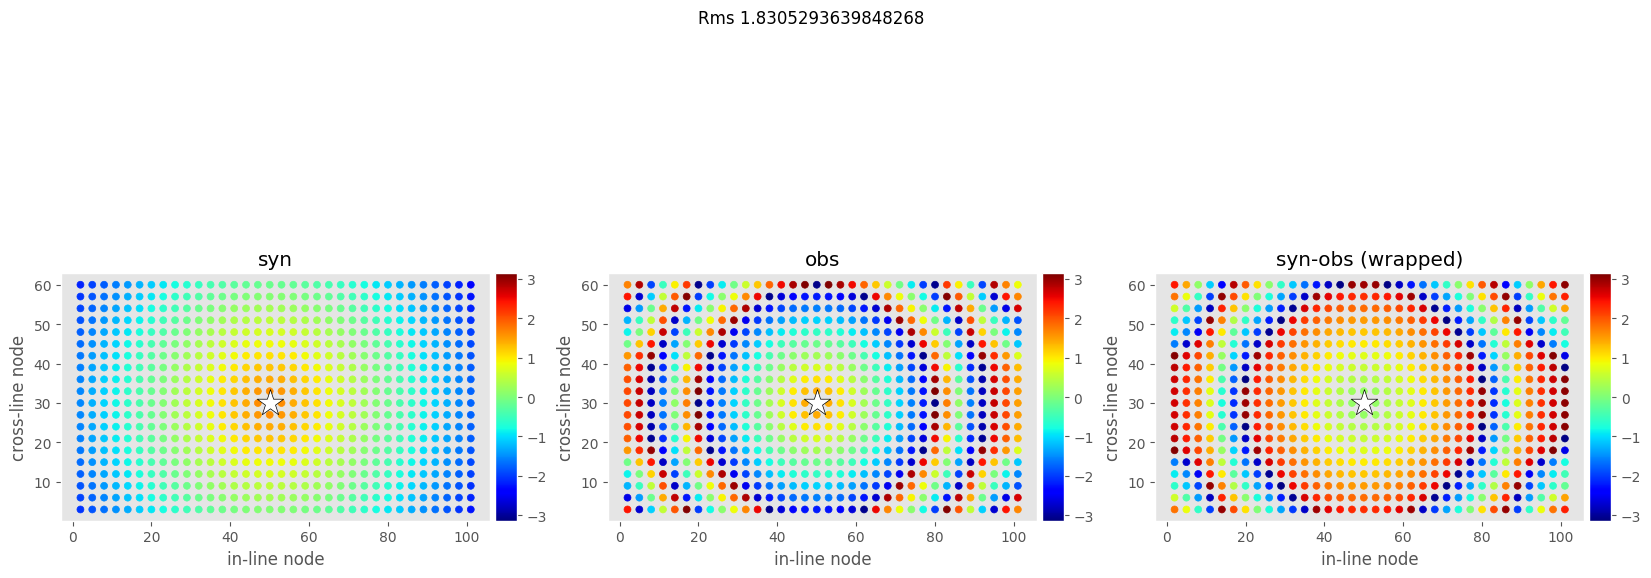

In [14]:
proj.out.dumpcomp.it[1][1].plot_phase(freq=2)

INFO:fullwavepy.generic.array.slice_array: Sliced at svalue=0 node of scoord=y axis


(0, 100)

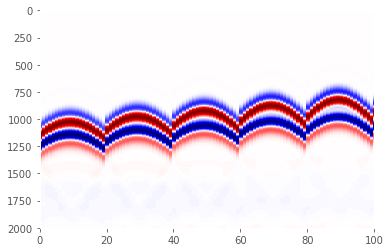

In [114]:
%matplotlib inline
proj.inp.obs.plot(norm='max')
plt.xlim(0,100)

In [27]:
# %matplotlib notebook
# %matplotlib notebook

# fig = plt.figure(figsize=[8,11])
# tracker = proj.out.vp.it[1].scrollall(fig)
# fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

In [54]:
# %matplotlib notebook
# %matplotlib notebook

# fig, ax = plt.subplots()
# def onSelect(x):
#     print(x)
# def onPress():
#     print('press')
# def onRelease():
#     print('release')
# lsso = LassoSelector(ax, onselect=onSelect, lineprops={'color': 'red', 'linewidth': 2, 'alpha': 1}, button=1)
# fig.canvas.mpl_connect('button_press_event', onPress)
# fig.canvas.mpl_connect('button_release_event', onRelease)

In [71]:
help(LassoSelector)

Help on class LassoSelector in module matplotlib.widgets:

class LassoSelector(_SelectorWidget)
 |  Selection curve of an arbitrary shape.
 |  
 |  For the selector to remain responsive you must keep a reference to it.
 |  
 |  The selected path can be used in conjunction with `~.Path.contains_point`
 |  to select data points from an image.
 |  
 |  In contrast to `Lasso`, `LassoSelector` is written with an interface
 |  similar to `RectangleSelector` and `SpanSelector`, and will continue to
 |  interact with the axes until disconnected.
 |  
 |  Example usage::
 |  
 |      ax = subplot(111)
 |      ax.plot(x,y)
 |  
 |      def onselect(verts):
 |          print(verts)
 |      lasso = LassoSelector(ax, onselect)
 |  
 |  Parameters
 |  ----------
 |  ax : :class:`~matplotlib.axes.Axes`
 |      The parent axes for the widget.
 |  onselect : function
 |      Whenever the lasso is released, the *onselect* function is called and
 |      passed the vertices of the selected path.
 |  butto

In [106]:
# help(np.nonzero)

<IPython.core.display.Javascript object>


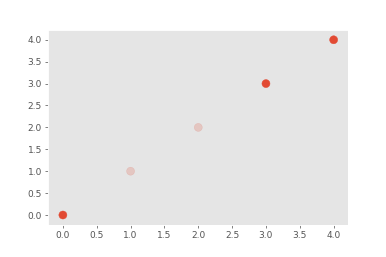

In [50]:
%matplotlib notebook
%matplotlib notebook

class LassoFader(object):
    """
    Helper     Artist         Container
    ax.scatter PathCollection ax.collections
    """
    def __init__(self, ax, collection):
        from matplotlib.widgets import LassoSelector
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.coords = self.collection.get_offsets()
        self.lasso = LassoSelector(ax, onselect=self.onselect)

        self.all_selected = []
        
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (len(self.coords), 1)) # help(np.tile)
        
        
    def onselect(self, path_vertices):
        from matplotlib.path import Path
        path = Path(path_vertices)
        self.ind = np.nonzero(path.contains_points(self.coords))[0] # BECAUSE IT RETURNS AN ARRAY IN A TUPLE
        self.all_selected += [list(xy) for xy in self.coords[self.ind]]
        #         self.fc[:, -1] = 1
        self.fc[self.ind, -1] = .2
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()        


#     def disconnect(self):
#         self.lasso.disconnect_events()
#         self.fc[:, -1] = 1
#         self.collection.set_facecolors(self.fc)
#         self.canvas.draw_idle()

fig, ax = plt.subplots()
path_collection = ax.scatter(range(5), range(5), s=80)
ms = LassoFader(ax, path_collection)
# fig.canvas.mpl_connect("key_press_event", accept)

In [52]:
ms.all_selected

[[1.0, 1.0], [2.0, 2.0]]

In [76]:
# help(Path)

In [15]:
# help(np.tile)

<IPython.core.display.Javascript object>


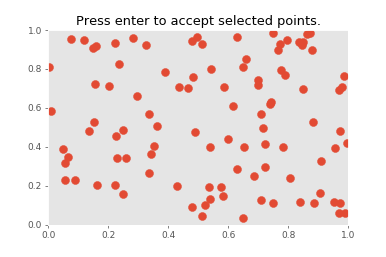

Text(0.5, 1.0, 'Press enter to accept selected points.')

In [56]:
import numpy as np

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect, lineprops={'color': 'k',
                                                                          'lw': 1,
                                                                          'alpha': 1
                                                                         })
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(100, 2)
# c = np.random.rand(len(data)) # kmc THIS SHOWS IT DOESN'T PRESERVE FACE COLORS EITHER!
subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
fig, ax = plt.subplots(subplot_kw=subplot_kw)

pts = ax.scatter(data[:, 0], data[:, 1], s=80)
# pts = ax.scatter(data[:, 0], data[:, 1], c=c, s=80) # kmc
selector = SelectFromCollection(ax, pts)

def accept(event):
    if event.key == "enter":
        print("Selected points:")
        print(selector.xys[selector.ind])
        selector.disconnect()
        ax.set_title("")
        fig.canvas.draw()

fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("Press enter to accept selected points.")

In [37]:
selector.xys[selector.ind]

array([[0.46638326, 0.7028127 ],
       [0.54323939, 0.79989953],
       [0.38826409, 0.78306588],
       [0.48899874, 0.47471864],
       [0.61465203, 0.60906377],
       [0.48378828, 0.75702762],
       [0.43493966, 0.70741178],
       [0.58457984, 0.70809633]])

# *Read DUMPCOMPARE

Move it to fullwave3d.ipynb

In [17]:
D = proj.out.dumpdat.it[1][1].read()
D.shape

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 31  trace(s) as observed data


(31, 4000)

In [20]:
C = proj.out.dumpcomp.it[1][1].read(scoord=None)
C.shape

(93, 1, 4000)

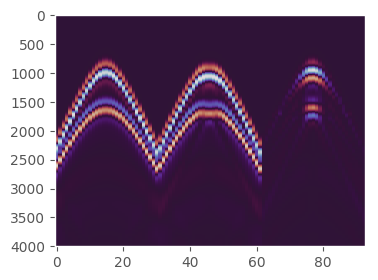

In [21]:
plot(C)

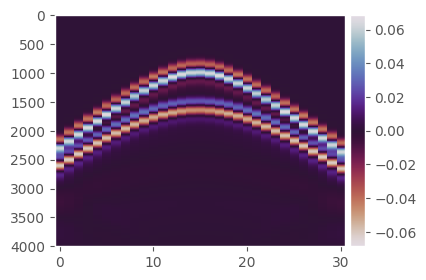

In [32]:
plot(C[:31], cbar=1)

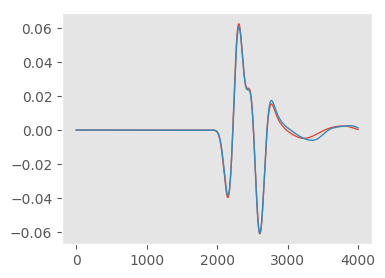

In [35]:
plt.plot(C[:31][0][0])
plt.plot(C[31:62][0][0])

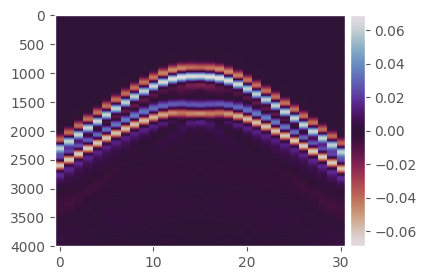

In [33]:
plot(C[31:62], cbar=1)

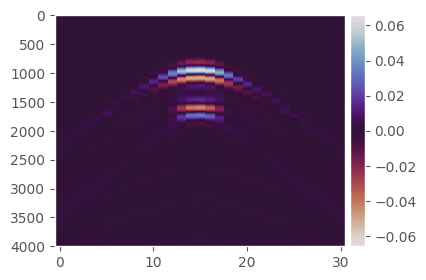

In [41]:
plot(C[-31:], cbar=1)

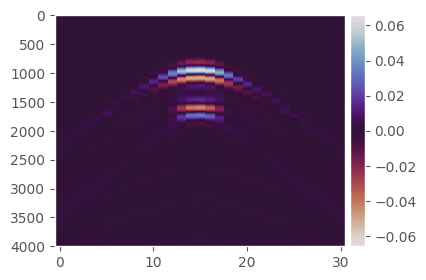

In [42]:
diff = C[:31] - C[31:62]
plot(diff, cbar=1)

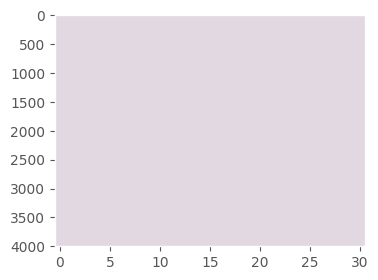

In [43]:
plot(diff-C[-31:])

# ...